<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/ml_python.png' width=600/></center>

<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/levelup.png' width=240/></center>

# 과제: 고객 신용도 예측


<img src = "https://github.com/Jangrae/img/blob/master/credit-card.jpg?raw=true" width=900 align="left"/>

# 실습 안내

**1) 실습 방법**

- 데이터 전처리와 탐색 보다는 모델 코딩에 중점을 둡니다.
- 기존 소스에서 복사해 붙여넣기 하지 않고 다시 코딩합니다.
- 실습 후 시간이 남으면 데이터 탐색과 성능 튜닝을 진행합니다. 
- 모든 코드 셀에는 주석을 충분히 답니다.
- 마크다운 셀을 사용해 작업 한 내용을 충분히 설명합니다.
- 입력을 요구한 (의견) 부분을 충분히 채웁니다.

**2) 실습 내용**

- 대상 데이터를 읽어와 탐색하며 이해합니다.
- 결측치를 확인하고 처리합니다.
- 다양한 방법으로 데이터를 탐색하고 결과를 정리합니다.
- 범주형 변수를 구분하고 가변수화를 진행합니다.
- 연속형 변수를 구분하고 정규화를 진행합니다.
- 데이터를 학습용 데이터와 평가용 데이터로 분리합니다.
- 다양한 머신러닝 알고리즘을 사용해 모델링합니다.
- 성능 평가 결과를 이해하고 설명합니다.
- 더 나은 성능을 보이도록 특정 모델을 튜닝합니다.

**3) 데이터 정보**

<img src = "https://github.com/Jangrae/img/blob/master/credit.png?raw=true" width=550 align="left"/>

# 1.환경 준비

- 기본 라이브러리와 대상 데이터를 가져와 이후 과정을 준비합니다.

In [1]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import matplotlib

warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format='retina'

matplotlib.font_manager._rebuild()
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

In [2]:
# 데이터 읽어오기
# path = 'https://raw.githubusercontent.com/Jangrae/csv/master/credit_NA.csv'
path = 'https://bit.ly/CreditFile'
data = pd.read_csv(path)

# 2.데이터 이해

- 다양한 탐색 및 분석 방법을 사용해 대상 데이터를 충분히 이해합니다.

## 2.1.기본 정보 확인

- 데이터에 대한 기본 정보를 우선 확인합니다.

**1) 상/하위 데이터 확인**

- 데이터 앞/뒤를 살펴 데이터를 간단히 확인합니다.

In [3]:
data.head()

,Creditability,AccountBalance,CreditDuration,Payment,Purpose,CreditAmount,Employment,SexMarital,CurrentAddress,MostValuable,Age,ApartmentType,NoCredits,Occupation,Telephone,ForeignWorker
0,1,3,24,2,0,1249,2,4,2,1,28.0,2,1,3,1,1
1,1,2,9,2,0,276,3,4,4,1,22.0,1,1,2,1,1
2,1,1,18,4,2,1049,2,2,4,2,21.0,1,1,3,1,1
3,1,1,24,4,1,6419,5,2,4,4,NaN,3,2,4,2,1
4,1,3,12,2,2,1424,5,2,4,1,55.0,2,1,4,2,1


In [4]:
data.tail()

,Creditability,AccountBalance,CreditDuration,Payment,Purpose,CreditAmount,Employment,SexMarital,CurrentAddress,MostValuable,Age,ApartmentType,NoCredits,Occupation,Telephone,ForeignWorker
995,1,1,12,2,3,1680,5,4,1,1,35.0,2,1,3,1,1
996,1,1,42,2,2,7882,4,3,4,2,45.0,3,1,3,1,1
997,0,2,54,0,9,15945,2,3,4,4,58.0,1,1,3,2,1
998,1,2,15,4,3,1537,5,3,4,1,50.0,2,2,3,2,1
999,0,3,12,2,0,1386,3,2,2,2,26.0,2,1,3,1,1


**2) 변수 정보 확인**

- 변수 이름, 값 개수, 데이터 형식등을 확인합니다.

In [5]:
# 데이터 정보
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Creditability   1000 non-null   int64  
 1   AccountBalance  1000 non-null   int64  
 2   CreditDuration  1000 non-null   int64  
 3   Payment         1000 non-null   int64  
 4   Purpose         1000 non-null   int64  
 5   CreditAmount    1000 non-null   int64  
 6   Employment      1000 non-null   int64  
 7   SexMarital      1000 non-null   int64  
 8   CurrentAddress  1000 non-null   int64  
 9   MostValuable    1000 non-null   int64  
 10  Age             983 non-null    float64
 11  ApartmentType   1000 non-null   int64  
 12  NoCredits       1000 non-null   int64  
 13  Occupation      1000 non-null   int64  
 14  Telephone       1000 non-null   int64  
 15  ForeignWorker   1000 non-null   int64  
dtypes: float64(1), int64(15)
memory usage: 125.1 KB


**3) 기초통계정보 확인**

- 기초통계정보를 통해 숫자 데이터를 갖는 변수들 값 분포를 확인합니다.

In [6]:
# 기초통계량 요약
data.describe()

,Creditability,AccountBalance,CreditDuration,Payment,Purpose,CreditAmount,Employment,SexMarital,CurrentAddress,MostValuable,Age,ApartmentType,NoCredits,Occupation,Telephone,ForeignWorker
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,983.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.700000,2.183000,20.903000,2.54500,2.828000,3271.24800,3.384000,2.68200,2.845000,2.358000,35.495422,1.928000,1.407000,2.904000,1.404000,1.037000
std,0.458487,0.835589,12.058814,1.08312,2.744439,2822.75176,1.208306,0.70808,1.103718,1.050209,11.302980,0.530186,0.577654,0.653614,0.490943,0.188856
min,0.000000,1.000000,4.000000,0.00000,0.000000,250.00000,1.000000,1.00000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,1.000000,12.000000,2.00000,1.000000,1365.50000,3.000000,2.00000,2.000000,1.000000,27.000000,2.000000,1.000000,3.000000,1.000000,1.000000
50%,1.000000,2.000000,18.000000,2.00000,2.000000,2319.50000,3.000000,3.00000,3.000000,2.000000,33.000000,2.000000,1.000000,3.000000,1.000000,1.000000
75%,1.000000,3.000000,24.000000,4.00000,3.000000,3972.25000,5.000000,3.00000,4.000000,3.000000,42.000000,2.000000,2.000000,3.000000,2.000000,1.000000
max,1.000000,3.000000,72.000000,4.00000,10.000000,18424.00000,5.000000,4.00000,4.000000,4.000000,75.000000,3.000000,4.000000,4.000000,2.000000,2.000000


**4) 결측치 확인**

- 결측치가 있는지 확인합니다.

In [7]:
# 결측치 확인
data.isna().sum()

Creditability      0
AccountBalance     0
CreditDuration     0
Payment            0
Purpose            0
CreditAmount       0
Employment         0
SexMarital         0
CurrentAddress     0
MostValuable       0
Age               17
ApartmentType      0
NoCredits          0
Occupation         0
Telephone          0
ForeignWorker      0
dtype: int64

## 2.2.데이터 상세 확인(5가지 이상 추가)

- 데이터를 **충분히 이해할 수 있도록** 집계와 시각화를 통해 살펴봅니다.
- 이후 모델링을 진행해야 하니 분석에 너무 많은 시간을 할애해서는 안됩니다.
- 분석 결과를 관련 코드 셀 아래에 정리합니다.

**1) Target 값 분포 확인**

- Target 변수인 Creditability 변수의 값 분포를 확인합니다.

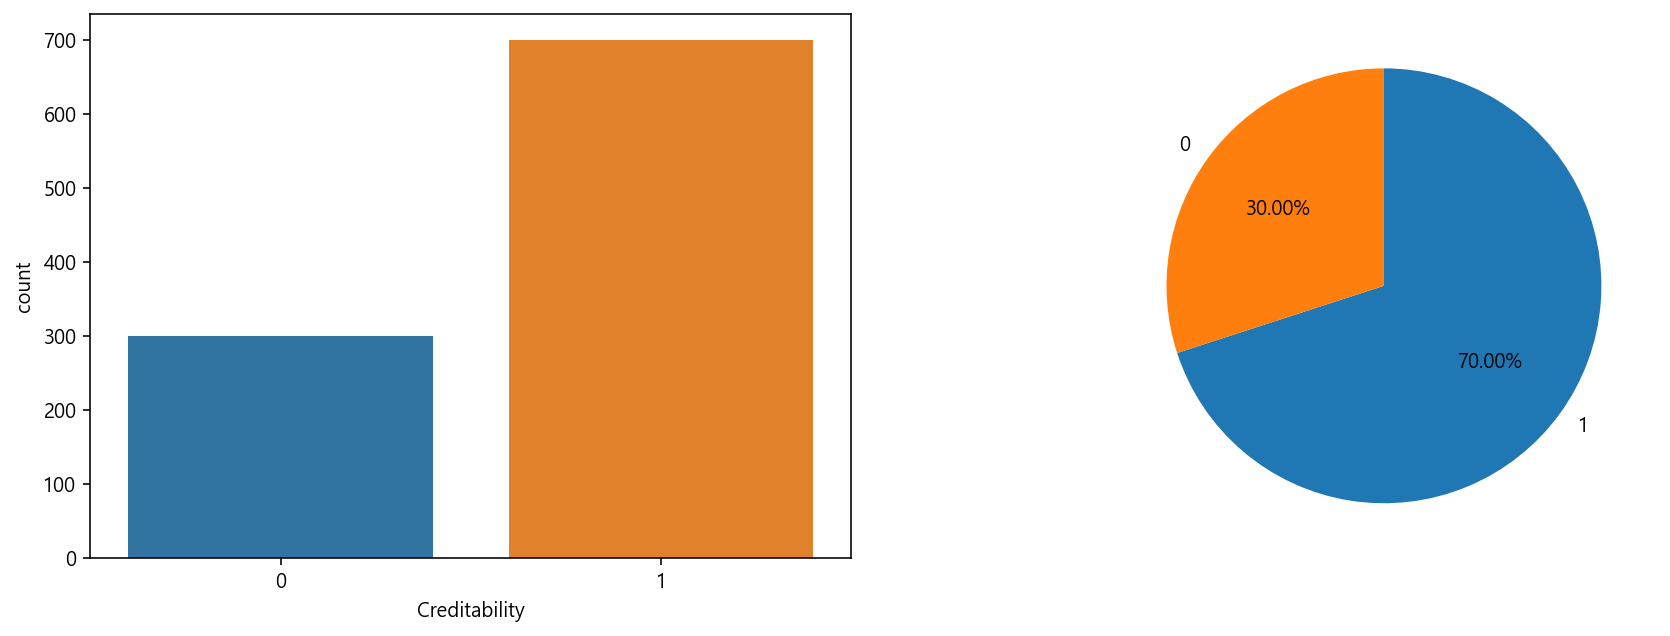

In [8]:
# 히스토그램, 파이차트 시각화
target = 'Creditability'
cnt = data[target].value_counts()
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(data[target])

plt.subplot(1,2,2)
plt.pie(cnt.values, labels=cnt.index, autopct='%.2f%%', startangle=90, counterclock=False)
plt.show()

- (의견) 신용도 허가 비율이 7:3으로 허가한다는 비중이 굉장히 높은 편이다.
- (의견) 데이터 간의 불균형이 존재하기 때문에 이를 고려하여 분석을 진행해야한다.

**2) 변수 구분**

- Target 변수(Creditability)를 제외한 변수를 범주형과 연속형으로 구분해 목륵을 정리합니다.
- 목록 개수는 필요한 만큼 늘려 사용합니다.

- 범주형 변수 (가변수화 대상)
    -  AccountBalance, 
    -  Payment 
    -  Purpose 
    -  SexMarital 
    -  MostValuable 
    -  ApartmentType 
    -  Occupation
    -  Telephone
    -  ForeignWorker
    -  Employment 
    -  CurrentAddress 
    -  NoCredits   

- 연속형 변수 (정규화 대상)
    -  AGE
    -  CreditDuration
    -  CreditAmount 

**3) 범주형 변수 확인**

- Target 변수(Creditability)를 제외한 범주형 변수의 범주값과 그 값의 개수를 확인합니다.
- 참고: 대상 변수를 리스트로 선언하고 반복문을 수행해 확인하면 편리합니다.

In [9]:
# 범주형 변수 확인
cols = ['AccountBalance', 'Payment', 'Purpose', 'SexMarital', 'MostValuable', 'ApartmentType', 'Occupation', 'Telephone', 'ForeignWorker', 'Employment', 'CurrentAddress', 'NoCredits'
]
for v in cols:
    print(data[v].value_counts())

3    457
1    274
2    269
Name: AccountBalance, dtype: int64
2    530
4    293
3     88
1     49
0     40
Name: Payment, dtype: int64
3     280
0     234
2     181
1     103
9      97
6      50
5      22
4      12
10     12
8       9
Name: Purpose, dtype: int64
3    548
2    310
4     92
1     50
Name: SexMarital, dtype: int64
3    332
1    282
2    232
4    154
Name: MostValuable, dtype: int64
2    714
1    179
3    107
Name: ApartmentType, dtype: int64
3    630
2    200
4    148
1     22
Name: Occupation, dtype: int64
1    596
2    404
Name: Telephone, dtype: int64
1    963
2     37
Name: ForeignWorker, dtype: int64
3    339
5    253
4    174
2    172
1     62
Name: Employment, dtype: int64
4    413
2    308
3    149
1    130
Name: CurrentAddress, dtype: int64
1    633
2    333
3     28
4      6
Name: NoCredits, dtype: int64


- (의견) 대부분 숫자형태로 나타나있기 때문에 구별하기 어려운 변수는 알기 쉽도록 문자형태로 변환하여 가변수화한다.
- (의견) 주요하게 생각하는 범주에 분포를 확인하여 분석해볼 필요가 있다.

**4) 변환**

- 숫자형태에서 구별하기 어려운 변수 변환

In [10]:
data['AccountBalance'].replace({1:'no account', 2:'no balance', 3:'some balance'},inplace=True)
data['Payment'].replace({0:'delayed', 1:'other credits', 2:'paid up', 3:'no problem', 4:'previous credits paid'}, inplace=True)
data['Purpose'].replace({0:'others', 1:'new car', 3:'used car', 4:'TV', 5:'appliances', 6:'repair', 8:'vacation', 9:'retaining', 10:'business'}, inplace=True)
data['Employment'].replace({1:'unemployed', 2:'less 1 year', 3:'1~4', 4:'4~7', 5:'above 7'}, inplace=True)
data['SexMarital'].replace({1:'male and diversed', 2:'male and single', 3:'male and married/widowed', 4:'female'}, inplace=True)
data['CurrentAddress'].replace({1:'less 1 year', 2:'1~4', 3:'4~7', 4:'above 7'}, inplace=True)
data['MostValuable'].replace({1:'none', 2:'car', 3:'life insurance', 4:'real estate'}, inplace=True)
data['ApartmentType'].replace({1:'free apartment', 2:'rented', 3:'owned'}, inplace=True)
data['Occupation'].replace({1:'Unemployed and unskilled', 2:'unskilled permanent resident', 3:'skilled', 4:'executive'}, inplace=True)

In [11]:
cols = ['AccountBalance', 'Payment', 'Purpose', 'SexMarital', 'MostValuable', 'ApartmentType', 'Occupation', 'Telephone', 'ForeignWorker', 'Employment', 'CurrentAddress', 'NoCredits'
]
for v in cols:
    print(data[v].value_counts())

some balance    457
no account      274
no balance      269
Name: AccountBalance, dtype: int64
paid up                  530
previous credits paid    293
no problem                88
other credits             49
delayed                   40
Name: Payment, dtype: int64
used car      280
others        234
2             181
new car       103
retaining      97
repair         50
appliances     22
TV             12
business       12
vacation        9
Name: Purpose, dtype: int64
male and married/widowed    548
male and single             310
female                       92
male and diversed            50
Name: SexMarital, dtype: int64
life insurance    332
none              282
car               232
real estate       154
Name: MostValuable, dtype: int64
rented            714
free apartment    179
owned             107
Name: ApartmentType, dtype: int64
skilled                         630
unskilled permanent resident    200
executive                       148
Unemployed and unskilled         22


- (의견) 이해하기 어려운형태의 범주형 변수를 문자형태로 변환하였다.
- (의견) 신용도에 영향을 끼치는 주요변수를 선정하여 추가적인 분석을 진행해야한다.

**5) Payment 변수 분석**

- 과거 대출 납입상태 분석

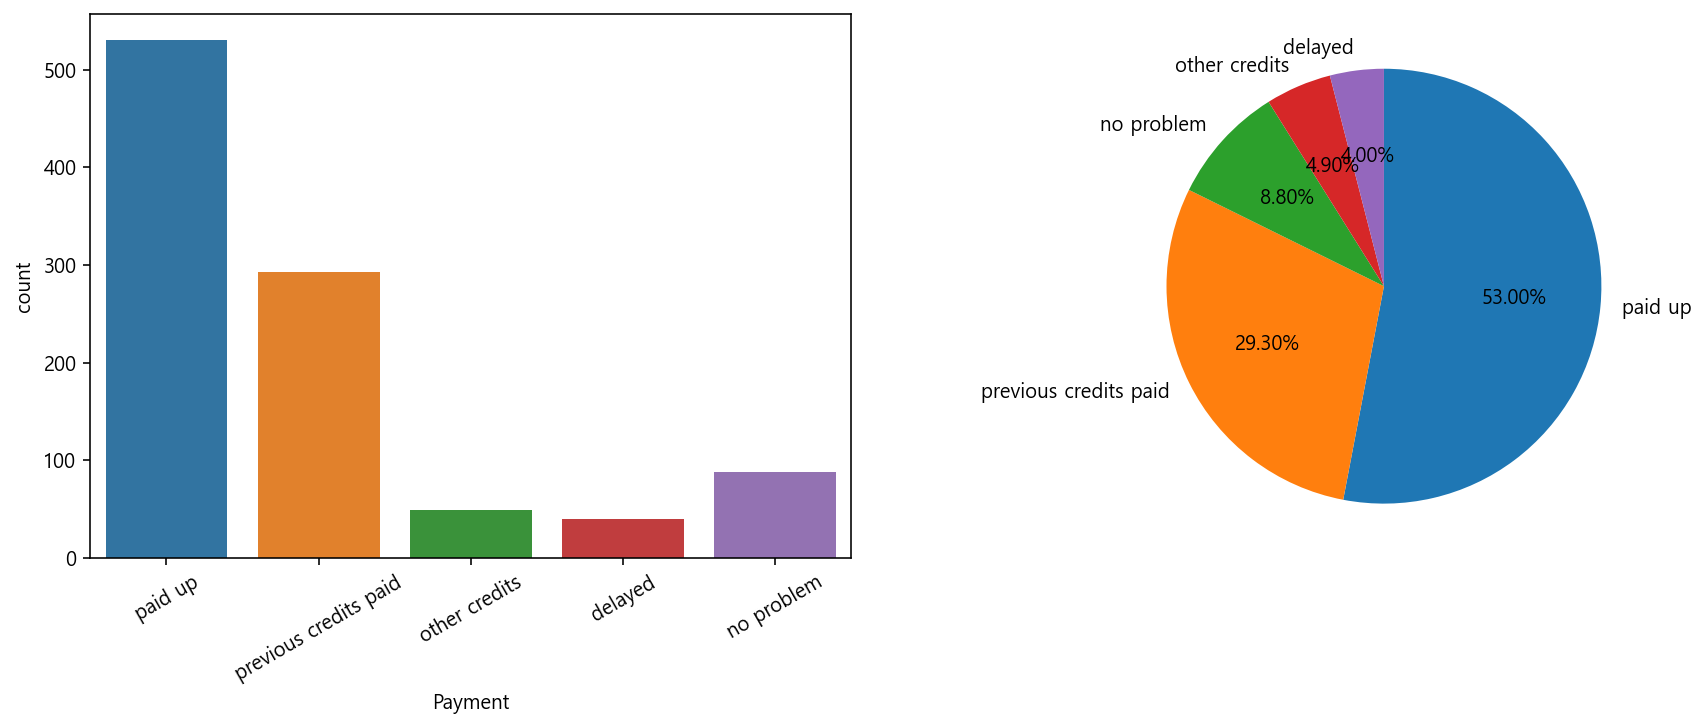

In [12]:
# 시각화
var = 'Payment'
cnt = data[var].value_counts()
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(data[var])
plt.xticks(rotation=30)

plt.subplot(1,2,2)
plt.pie(cnt.values, labels=cnt.index, autopct='%.2f%%', startangle=90, counterclock=False)
plt.show()

- (의견) 과반수 이상이 대출금을 이미 지불하였다.
- (의견) 데이터 분포에서 대출금이 이미 지불하였거나 지불되어 문제가없는 사람들은 전체의 90%를 차지한다.

**6) Account Balance 분석**

- 은행 잔고 분포도 분석

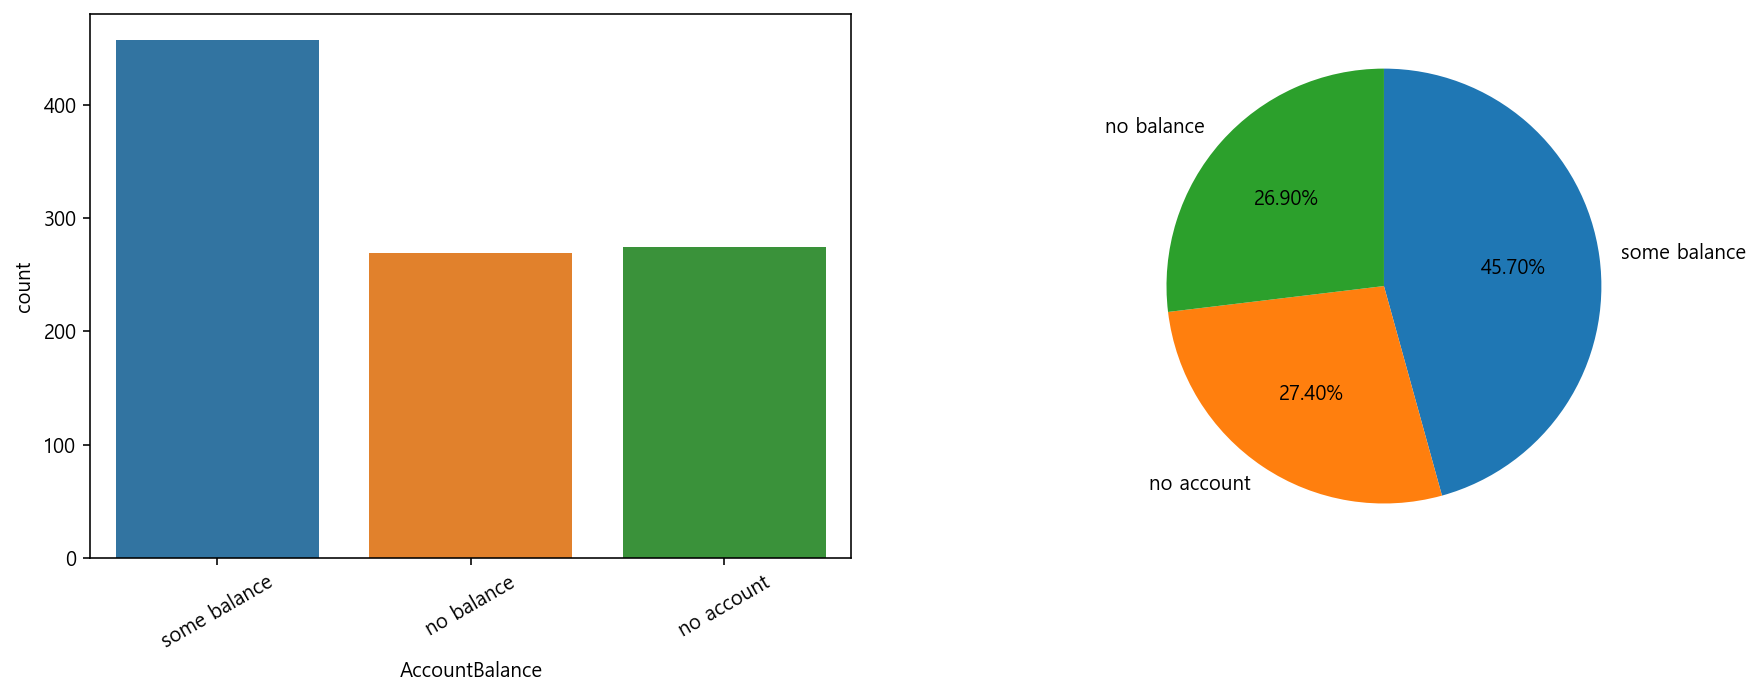

In [13]:
# 시각화
var = 'AccountBalance'
cnt = data[var].value_counts()
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(data[var])
plt.xticks(rotation=30)

plt.subplot(1,2,2)
plt.pie(cnt.values, labels=cnt.index, autopct='%.2f%%', startangle=90, counterclock=False)
plt.show()

- (의견) 계좌가 없는 고객이 30%가량 존재하며 계좌에 돈이 없는 고객까지 포함하면 과반수를 넘는다.
- (의견) 계좌없는 고객과 있는 고객을 나누어 분석해볼 필요가 있다.

 **7) 아파트 현황**

- 현재 아파트 상태

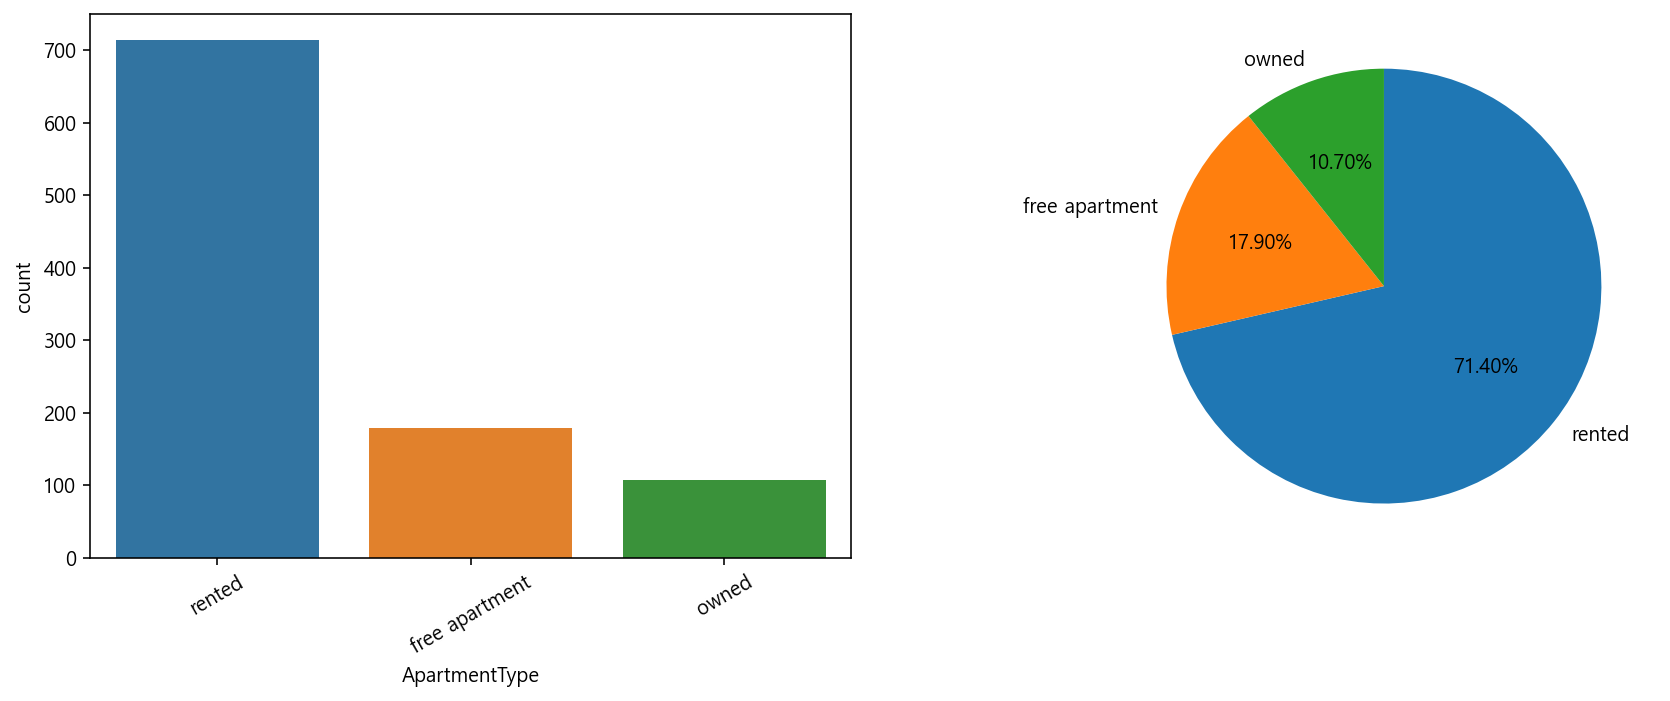

In [14]:
# 시각화
var = 'ApartmentType'
cnt = data[var].value_counts()
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(data[var])
plt.xticks(rotation=30)

plt.subplot(1,2,2)
plt.pie(cnt.values, labels=cnt.index, autopct='%.2f%%', startangle=90, counterclock=False)
plt.show()

- (의견) 고객들은 대부분 렌트형식의 아파트에 거주하고 있다.
- (의견) 아파트를 소유한 고객은 대출이 더 쉬울 것으로 예상한다.

**8) 직업**

- 직업현황.

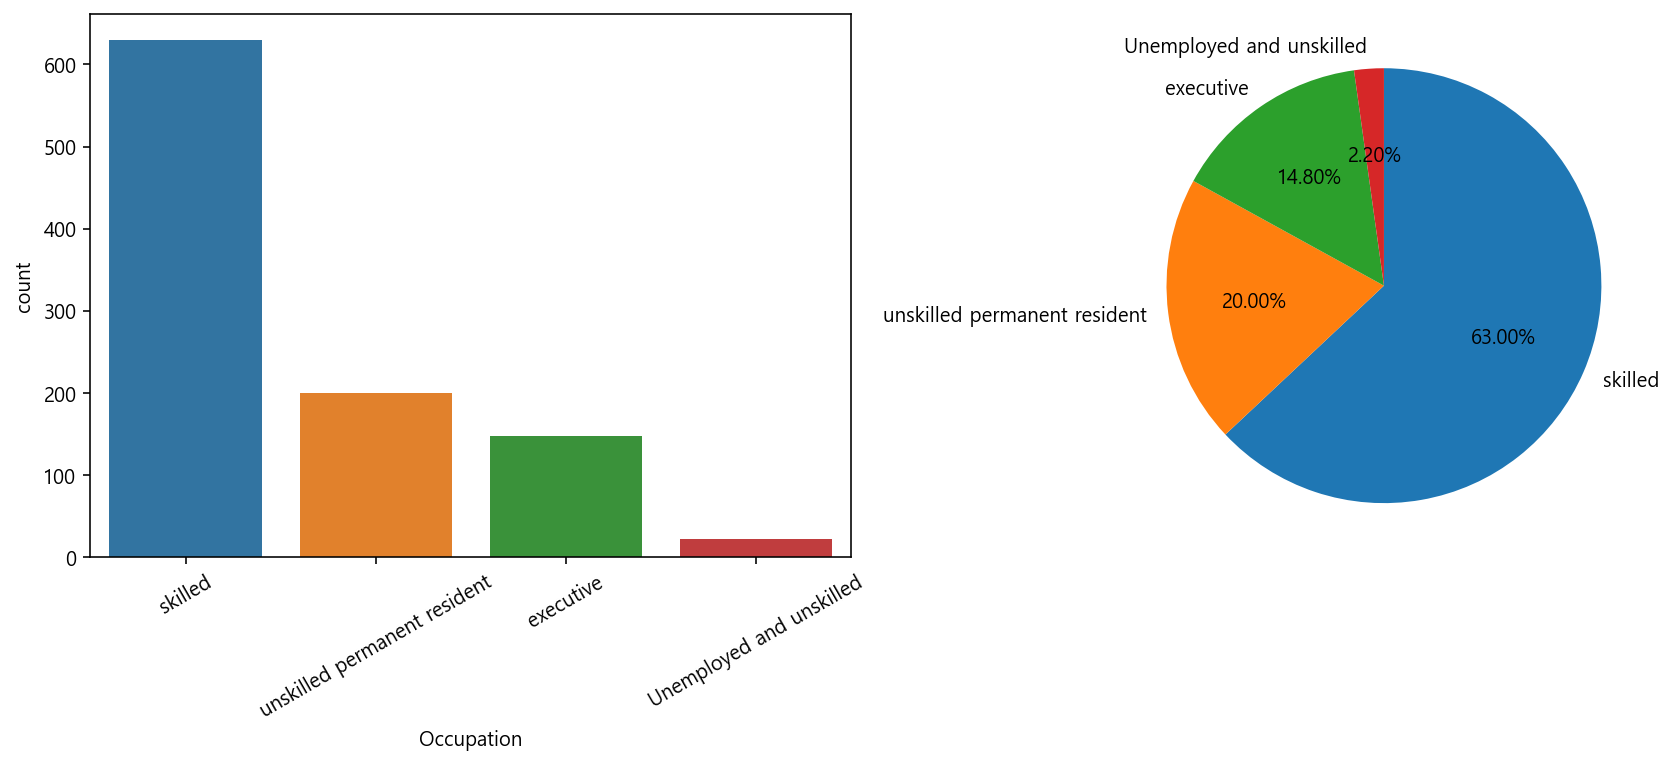

In [15]:
# 시각화
var = 'Occupation'
cnt = data[var].value_counts()
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(data[var])
plt.xticks(rotation=30)

plt.subplot(1,2,2)
plt.pie(cnt.values, labels=cnt.index, autopct='%.2f%%', startangle=90, counterclock=False)
plt.show()

- (의견) 대부분의 고객들은 기술과 전문직에 해당된다(약 78%)
- (의견) 기술과 직업이 없는고객은 신용도가 낮을것으로 예상된다.

# 3.데이터 준비

- 전처리 과정을 통해 머신러닝 알고리즘에 사용할 수 있는 형태의 데이터를 준비합니다.

**1) 결측치 처리**

- Age 변수에 대한 결측치 처리를 진행합니다.
- 데이터 양이 많지 않으니 제거 보다는 채우기를 권고합니다.

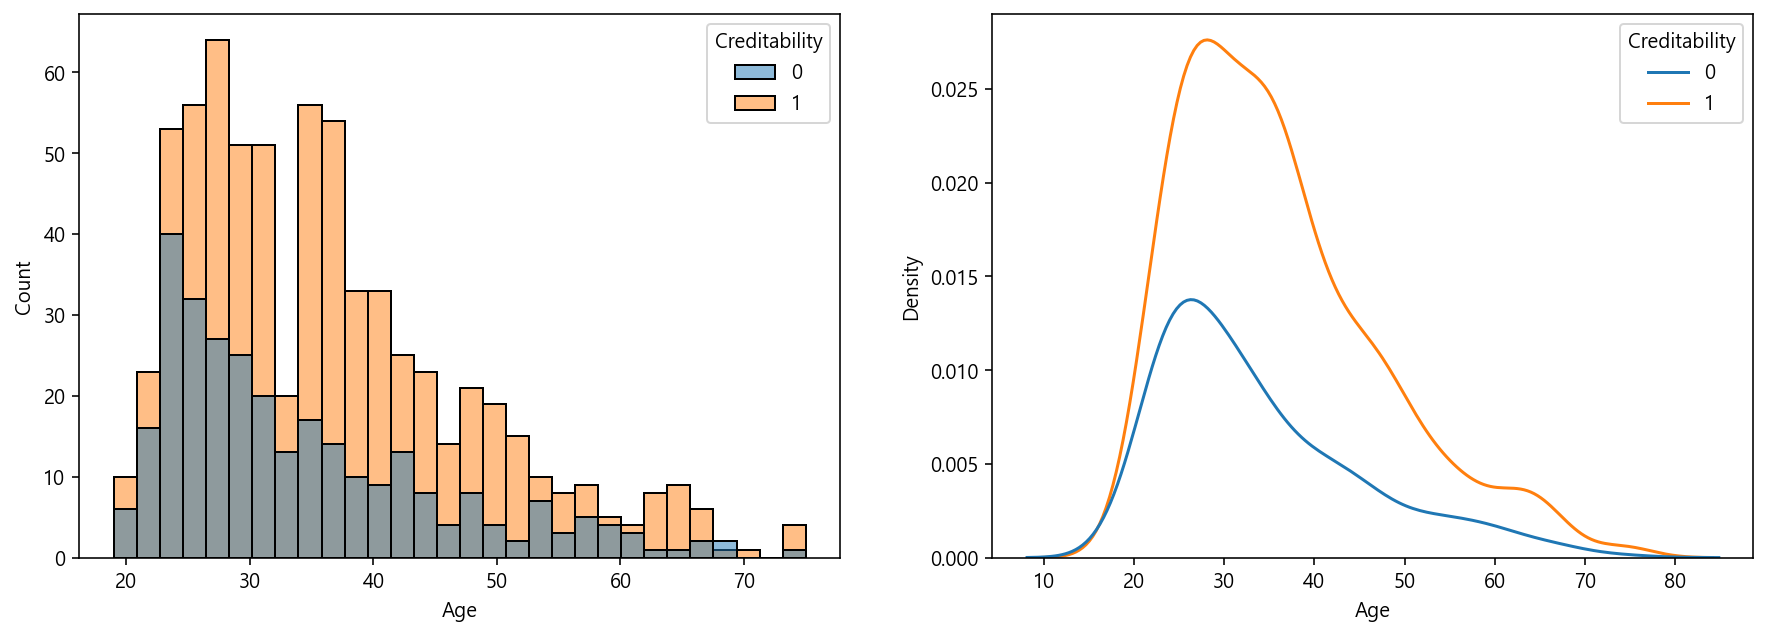

In [16]:
# Age 변수 분석
var = 'Age'
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.histplot(x=data[var], hue=data[target], bins=30)

plt.subplot(1,2,2)
sns.kdeplot(data[var], hue=data[target], common_norm=True)
plt.show()

* 데이터가 왼쪽으로 치우쳐 있어 평균값은 데이터를 대표하는 수치가 아닐것으로 예상하며 최빈값으로 결측치를 대체한다.

In [17]:
# 최빈값 채우기
fill = data['Age'].value_counts().idxmax()
data['Age'].fillna(fill, inplace=True)
data.isna().sum()

Creditability     0
AccountBalance    0
CreditDuration    0
Payment           0
Purpose           0
CreditAmount      0
Employment        0
SexMarital        0
CurrentAddress    0
MostValuable      0
Age               0
ApartmentType     0
NoCredits         0
Occupation        0
Telephone         0
ForeignWorker     0
dtype: int64

In [18]:
data.to_excel(excel_writer='sample.xlsx')

**2) x, y 분리**

- Target을 선정하고 x, y를 분리합니다.

In [18]:
# x, y 분리
target = 'Creditability'
x = data.drop(target, axis=1)
y = data[target]

**3) 가변수화**

- 앞에서 범주형으로 구분한 변수에 대해 가변수화를 수행합니다.
- 참고: 이미 x, y로 분리가 되었으니 x에 대한 가변수화를 수행해야 합니다.


In [19]:
# 가변수화
cols = ['AccountBalance', 'Payment', 'Purpose', 'SexMarital', 'MostValuable', 'ApartmentType', 'Occupation', 'Telephone', 'ForeignWorker', 'Employment', 'CurrentAddress', 'NoCredits']
x = pd.get_dummies(x, columns=cols, drop_first=True)
x.head()

,CreditDuration,CreditAmount,Age,AccountBalance_no balance,AccountBalance_some balance,Payment_no problem,Payment_other credits,Payment_paid up,Payment_previous credits paid,Purpose_TV,...,Employment_4~7,Employment_above 7,Employment_less 1 year,Employment_unemployed,CurrentAddress_4~7,CurrentAddress_above 7,CurrentAddress_less 1 year,NoCredits_2,NoCredits_3,NoCredits_4
0,24,1249,28.0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,9,276,22.0,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2,18,1049,21.0,0,0,0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0
3,24,6419,27.0,0,0,0,0,0,1,0,...,0,1,0,0,0,1,0,1,0,0
4,12,1424,55.0,0,1,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0


**4) 정규화**

- 앞에서 연속형으로 구분한 변수에 대해 정규화를 진행합니다.

In [20]:
# 정규화
x = (x-x.min())/(x.max()-x.min())

**5) 학습용, 평가용 데이터 분리**


- 모델링을 위해 학습용, 평가용 데이터를 분리합니다.

In [21]:
# 학습용, 평가용 데이터 분리
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2022)

# 4.모델링

- 다음 알고리즘을 사용해 모델링을 진행합니다.
    - Logistic Regression
    - KNN
    - Decision Tree
    - Random Forest
    - XGBoost
- Classification Report를 사용해 성능을 평가합니다.
- 성능 평가 결과 아래에 성능에 대한 의견을 정리합니다.
- 혼동행렬, 변수 중요도 등을 시각화해 모델을 심도있게 탐색합니다.

## 4.1.Logistic Regression

### 4.1.1.모델링

- Logistic Regression 알고리즘을 사용해 모델링을 진행합니다.

In [22]:
# 불러오기
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [23]:
# 선언하기
model = LogisticRegression()

In [24]:
# 학습하기
model.fit(x_train, y_train)

LogisticRegression()

In [25]:
# 예측하기
y_pred = model.predict(x_test)

In [26]:
# 평가하기
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 48  49]
 [ 32 171]]
              precision    recall  f1-score   support

           0       0.60      0.49      0.54        97
           1       0.78      0.84      0.81       203

    accuracy                           0.73       300
   macro avg       0.69      0.67      0.68       300
weighted avg       0.72      0.73      0.72       300



In [27]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
score={}
score['Logistic Regression'] = [precision_score(y_test, y_pred),
                          recall_score(y_test, y_pred),
                          accuracy_score(y_test, y_pred)]

- (의견) 실제 대출이 허가된 사람들을 예측하는 비율이 굉장히 높은 모델이다.
- (의견) 대출이 허가될것으로 예측하는 성능도 뛰어나다.
- (의견) 하지만 대출이 불가한 사람들을 예측하는 성능은 매우 떨어진다.

### 4.1.2.모델 탐색(2가지 이상)

- 모델에 대해 추가로 살펴보고 의견을 작성합니다.

**1) 혼동행렬 시각화**

- 혼동행렬 시각화를 통해 실제 데이터 예측 정도를 비교

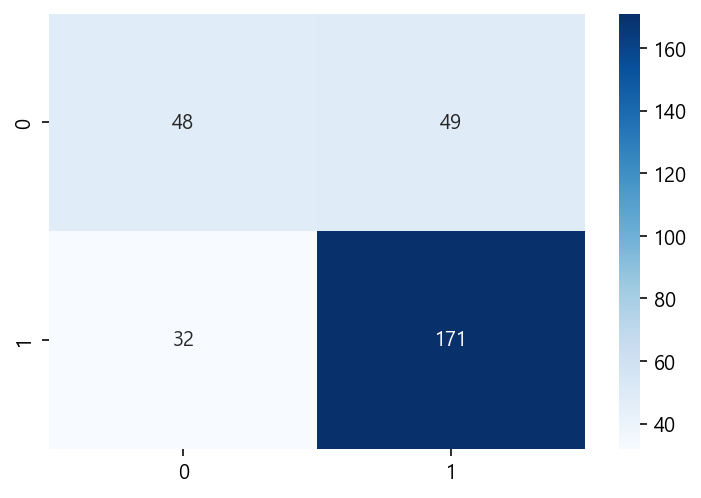

In [28]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='d')
plt.show()

- (의견) 대출이 허가되는 사람들을 예측하는 성능이 좋다.
- (의견) 데이터의 불균형으로 인해 일어나는 문제일 가능성이 있다.

**2) 회귀계수 확인**

- 회귀 계수

In [29]:
print(list(x))
print(model.coef_)
print(model.intercept_)

['CreditDuration', 'CreditAmount', 'Age', 'AccountBalance_no balance', 'AccountBalance_some balance', 'Payment_no problem', 'Payment_other credits', 'Payment_paid up', 'Payment_previous credits paid', 'Purpose_TV', 'Purpose_appliances', 'Purpose_business', 'Purpose_new car', 'Purpose_others', 'Purpose_repair', 'Purpose_retaining', 'Purpose_used car', 'Purpose_vacation', 'SexMarital_male and diversed', 'SexMarital_male and married/widowed', 'SexMarital_male and single', 'MostValuable_life insurance', 'MostValuable_none', 'MostValuable_real estate', 'ApartmentType_owned', 'ApartmentType_rented', 'Occupation_executive', 'Occupation_skilled', 'Occupation_unskilled permanent resident', 'Telephone_2', 'ForeignWorker_2', 'Employment_4~7', 'Employment_above 7', 'Employment_less 1 year', 'Employment_unemployed', 'CurrentAddress_4~7', 'CurrentAddress_above 7', 'CurrentAddress_less 1 year', 'NoCredits_2', 'NoCredits_3', 'NoCredits_4']
[[-1.91512377 -0.81569672  0.749811    0.63078911  1.6804926  

- (의견) 회귀 계수를 통해 모델의 관계를 확인할 수 있다.
- (의견) 신용도에 영향을 끼치는 요소는 신청대출기간, 잔고상태, 과거 대출금 납입상태 등이다.

## 4.2.Decision Tree

### 4.2.1.모델링

- Decision Tree 알고리즘을 사용해 모델링을 진행합니다.

In [30]:
from sklearn.tree import DecisionTreeClassifier

In [31]:
# 선언하기
model = DecisionTreeClassifier(random_state=2022, max_depth=5)

In [32]:
# 학습하기
model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=2022)

In [33]:
# 예측하기
y_pred = model.predict(x_test)

In [34]:
# 평가하기
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 49  48]
 [ 38 165]]
              precision    recall  f1-score   support

           0       0.56      0.51      0.53        97
           1       0.77      0.81      0.79       203

    accuracy                           0.71       300
   macro avg       0.67      0.66      0.66       300
weighted avg       0.71      0.71      0.71       300



In [35]:
# 성능저장
score['Decision Tree'] = [precision_score(y_test, y_pred),
                          recall_score(y_test, y_pred),
                          accuracy_score(y_test, y_pred)]

- (의견) Logistic모델과 비슷하게 실제 대출허가에 대한 예측성능은 높다.
- (의견) 데이터 불균형이 의심된다.
- (의견) 오버샘플링을 통해 모델의 성능을 높일 필요가 있다.

### 4.2.2.모델 탐색(2가지 이상)

- 모델에 대해 추가로 살펴보고 의견을 작성합니다.

**1) 트리 시각화**

- 트리 시각화를 통해 변수 상태 파악

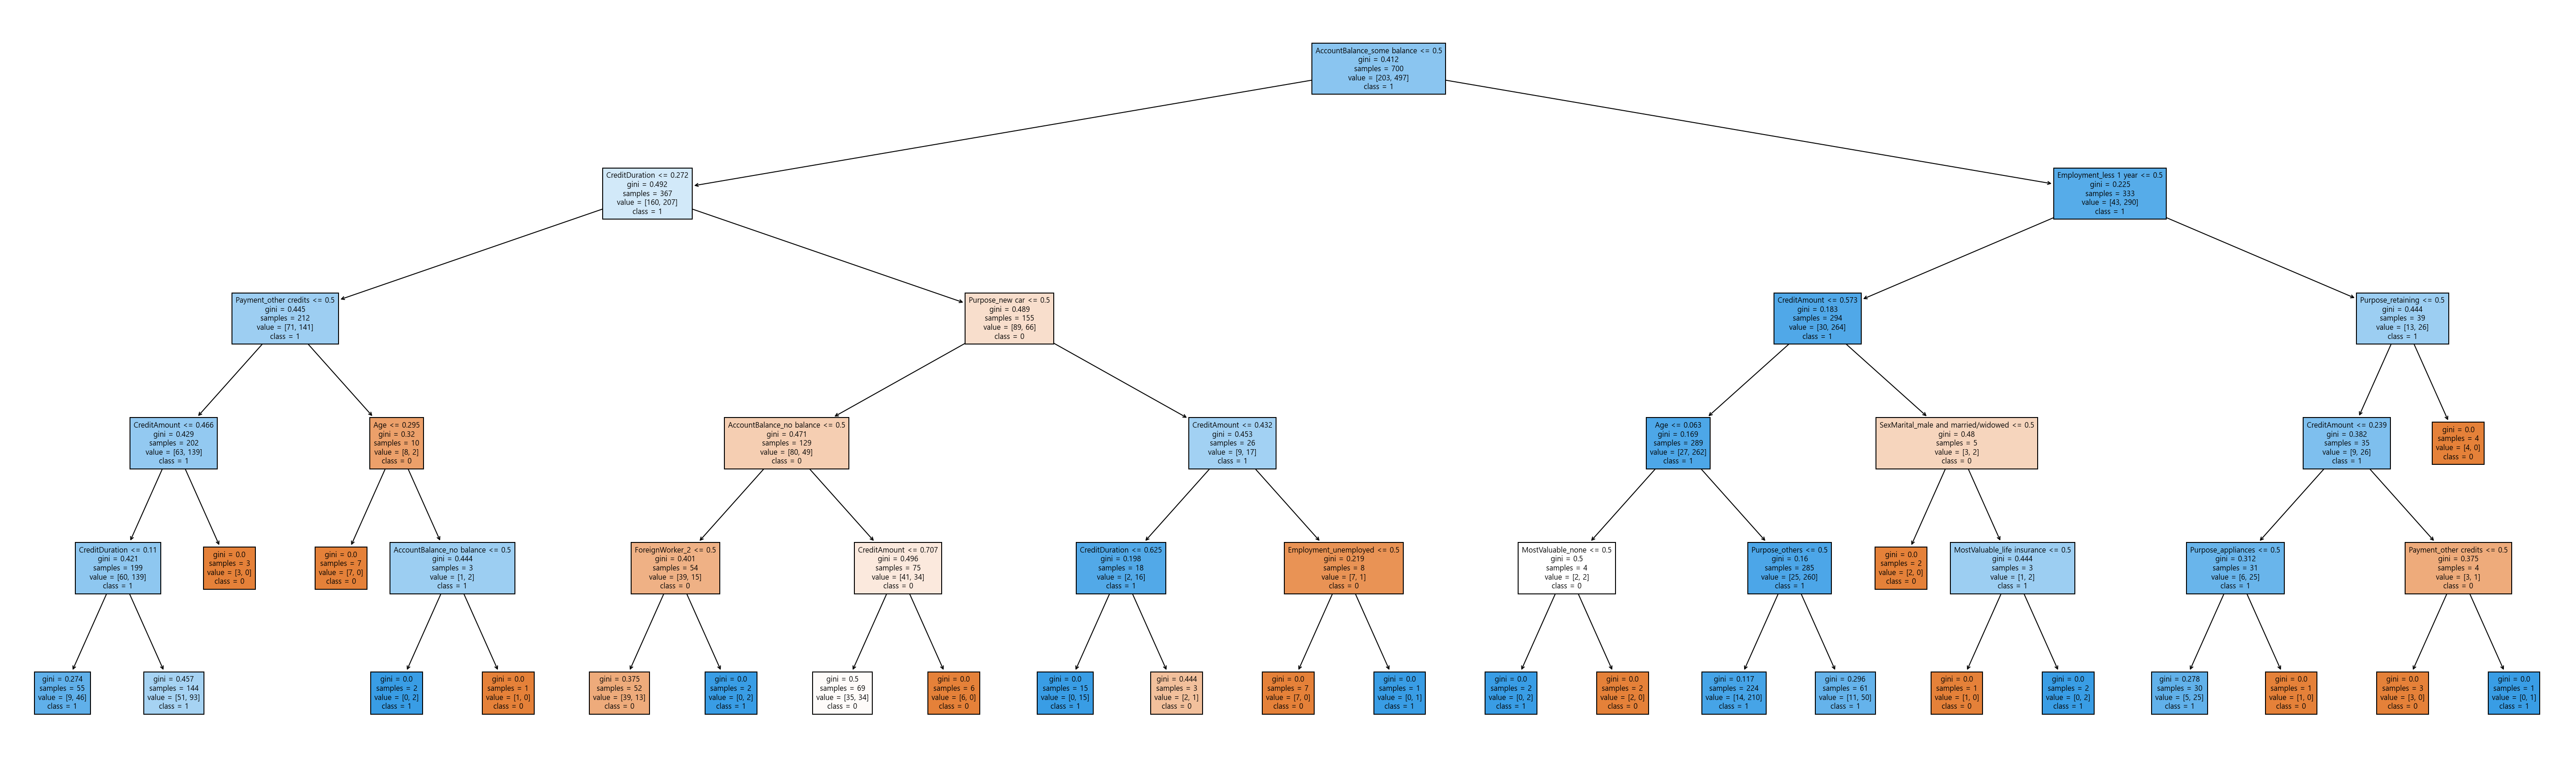

In [36]:
# 시각화
from sklearn.tree import plot_tree

plt.figure(figsize=(50, 15))
plot_tree(model, filled=True, class_names=['0', '1'], feature_names=list(x), fontsize=8)
plt.show()

- (의견) 잔고에 돈이 있는지가 가장 중요한 분류변수로 작용하고 있다.
- (의견) 이 모델에서 잔고상태 외에 대출 신청기간과 현재 직장근무기간또한 주요한 변수이다.

**2) 변수 중요도**

- 변수 중요도 시각화

In [37]:
# 중요도 확인
print(model.feature_names_in_)
print(model.feature_importances_)

['CreditDuration' 'CreditAmount' 'Age' 'AccountBalance_no balance'
 'AccountBalance_some balance' 'Payment_no problem'
 'Payment_other credits' 'Payment_paid up' 'Payment_previous credits paid'
 'Purpose_TV' 'Purpose_appliances' 'Purpose_business' 'Purpose_new car'
 'Purpose_others' 'Purpose_repair' 'Purpose_retaining' 'Purpose_used car'
 'Purpose_vacation' 'SexMarital_male and diversed'
 'SexMarital_male and married/widowed' 'SexMarital_male and single'
 'MostValuable_life insurance' 'MostValuable_none'
 'MostValuable_real estate' 'ApartmentType_owned' 'ApartmentType_rented'
 'Occupation_executive' 'Occupation_skilled'
 'Occupation_unskilled permanent resident' 'Telephone_2' 'ForeignWorker_2'
 'Employment_4~7' 'Employment_above 7' 'Employment_less 1 year'
 'Employment_unemployed' 'CurrentAddress_4~7' 'CurrentAddress_above 7'
 'CurrentAddress_less 1 year' 'NoCredits_2' 'NoCredits_3' 'NoCredits_4']
[0.15459867 0.16847739 0.03227393 0.03288646 0.33076991 0.
 0.06077606 0.         0.     

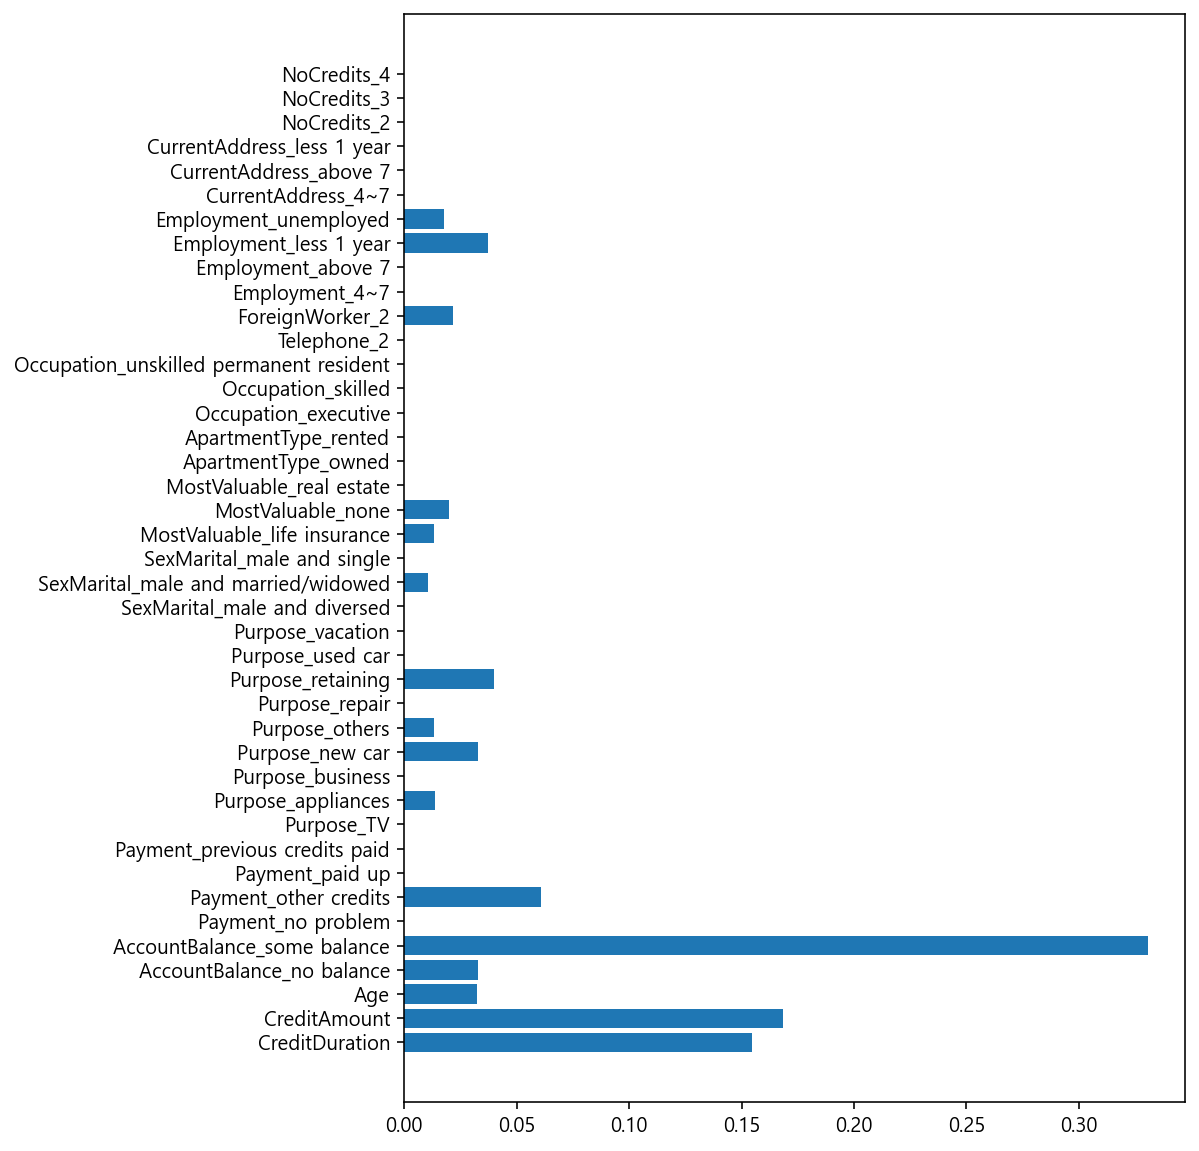

In [38]:
# 중요도 시각화
plt.figure(figsize=(7,10))
plt.barh(list(x), model.feature_importances_)
plt.show()

- (의견) 잔고에 돈이 있는지가 신용도에 가장 큰 영향을 미치며
- (의견) 대출금액과 대출기간이 다음올 주요한 변수로 작용한다.

## 4.3.KNN

### 4.3.1.모델링

- KNN 알고리즘을 사용해 모델링을 진행합니다.

In [39]:
from sklearn.neighbors import KNeighborsClassifier

In [40]:
# 선언하기
model = KNeighborsClassifier(n_neighbors=5)

In [41]:
# 학습하기
model.fit(x_train, y_train)

KNeighborsClassifier()

In [42]:
# 예측하기
y_pred = model.predict(x_test)

In [43]:
# 평가하기
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 30  67]
 [ 22 181]]
              precision    recall  f1-score   support

           0       0.58      0.31      0.40        97
           1       0.73      0.89      0.80       203

    accuracy                           0.70       300
   macro avg       0.65      0.60      0.60       300
weighted avg       0.68      0.70      0.67       300



In [44]:
score['KNN'] = [precision_score(y_test, y_pred),
                          recall_score(y_test, y_pred),
                          accuracy_score(y_test, y_pred)]

- (의견) 타 모델보다 신용도가 높아 대출이 허가되는 사람에 대한 예측성능이 좋다.
- (의견) 데이터의 불균형이 있어 전체적인 성능이 떨어지기 때문에 적절한 샘플링 방식이 필요하다.

### 4.3.2.모델 탐색(1가지 이상)

- 모델에 대해 추가로 살펴보고 의견을 작성합니다.

**1) 혼동행렬 시각화**

- 혼동행렬을 시각화 한다.

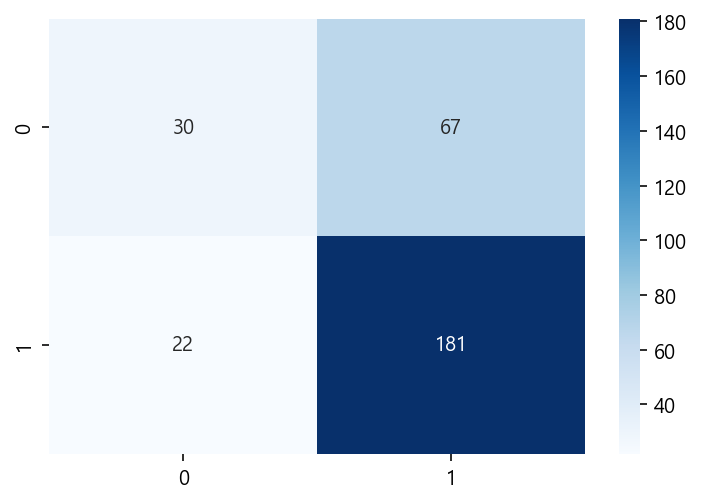

In [45]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='d')
plt.show()

- (의견) 데이터의 불균형이 확연하게 나타난다.
- (의견) 샘플링을통해 데이터의 불균형을 해결하고 새로 모델링 해볼 필요가 있다.

## 4.4.Random Forest

### 4.4.1.모델링

- Random Forest 알고리즘을 사용해 모델링을 진행합니다.

In [46]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
# 선언하기
model = RandomForestClassifier(random_state=2022)

In [48]:
# 학습하기
model.fit(x_train, y_train)

RandomForestClassifier(random_state=2022)

In [49]:
# 예측하기
y_pred = model.predict(x_test)

In [50]:
# 평가하기
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 42  55]
 [ 26 177]]
              precision    recall  f1-score   support

           0       0.62      0.43      0.51        97
           1       0.76      0.87      0.81       203

    accuracy                           0.73       300
   macro avg       0.69      0.65      0.66       300
weighted avg       0.72      0.73      0.72       300



In [51]:
score['Random Forest'] = [precision_score(y_test, y_pred),
                          recall_score(y_test, y_pred),
                          accuracy_score(y_test, y_pred)]

- (의견) 정확성이 타 모델보다 높아졌지만 여전히 데이터는 불균형하다.
- (의견) 데이터 불균형에 대한 해결책이 필요하다.
- (의견) 신용도가 실제로 높은사람에 대한 예측력이 현재 가장 높은 모델이다.

### 4.4.2.모델 탐색(2가지 이상)

- 모델에 대해 추가로 살펴보고 의견을 작성합니다.

**1) 혼동행렬 시각화**

- 혼동행렬을 통해 데이터의 분포를 파악

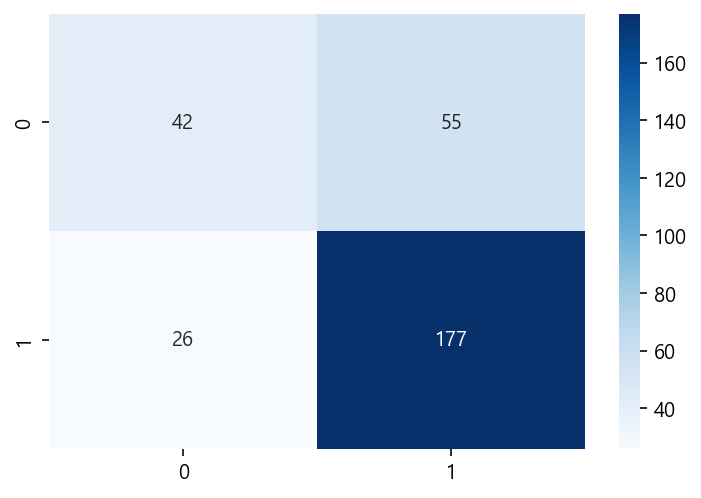

In [52]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='d')
plt.show()

- (의견) 타 모델과 마찬가지로 데이터의 불균형이 확연하게 나타난다.
- (의견) 샘플링을통해 데이터의 불균형을 해결하고 새로 모델링 해볼 필요가 있다.

**2) 주요변수확인**

- 신용도에 영향을 미치는 주요 변수 확인

In [53]:
# 중요도 확인
print(model.feature_names_in_)
print(model.feature_importances_)

['CreditDuration' 'CreditAmount' 'Age' 'AccountBalance_no balance'
 'AccountBalance_some balance' 'Payment_no problem'
 'Payment_other credits' 'Payment_paid up' 'Payment_previous credits paid'
 'Purpose_TV' 'Purpose_appliances' 'Purpose_business' 'Purpose_new car'
 'Purpose_others' 'Purpose_repair' 'Purpose_retaining' 'Purpose_used car'
 'Purpose_vacation' 'SexMarital_male and diversed'
 'SexMarital_male and married/widowed' 'SexMarital_male and single'
 'MostValuable_life insurance' 'MostValuable_none'
 'MostValuable_real estate' 'ApartmentType_owned' 'ApartmentType_rented'
 'Occupation_executive' 'Occupation_skilled'
 'Occupation_unskilled permanent resident' 'Telephone_2' 'ForeignWorker_2'
 'Employment_4~7' 'Employment_above 7' 'Employment_less 1 year'
 'Employment_unemployed' 'CurrentAddress_4~7' 'CurrentAddress_above 7'
 'CurrentAddress_less 1 year' 'NoCredits_2' 'NoCredits_3' 'NoCredits_4']
[0.10473792 0.14183596 0.11219392 0.02342512 0.08698686 0.01080204
 0.01092163 0.01603474

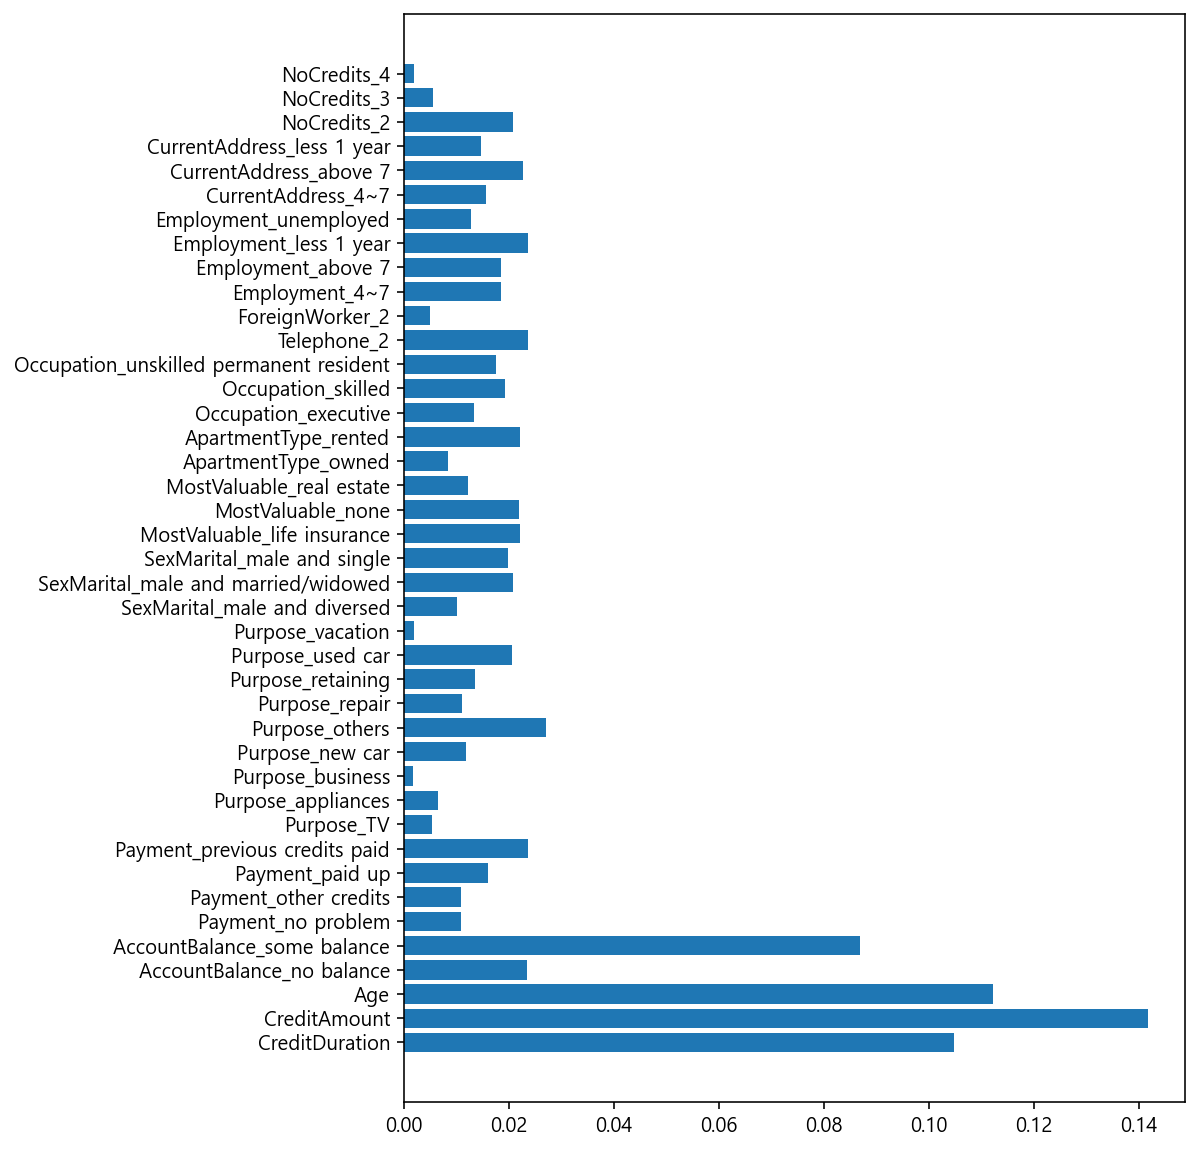

In [54]:
# 중요도 시각화
plt.figure(figsize=(7,10))
plt.barh(list(x), model.feature_importances_)
plt.show()

- (의견) 신청한 대출금액이 가장 주요한 영향을 가지는 변수로 나타났다.
- (의견) 이 모델에서 나이가 주요변수로 나타났는데 분석해 볼 필요가 있다.

## 4.5.XGBoost

### 4.5.1.모델링

- XGBoost 알고리즘을 사용해 모델링을 진행합니다.

In [55]:
from xgboost import XGBClassifier

In [56]:
# 선언하기
model = XGBClassifier(random_state=2022, eval_metric='logloss')

In [57]:
# 학습하기
model.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=2022,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [58]:
# 예측하기
y_pred = model.predict(x_test)

In [59]:
# 평가하기
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 50  47]
 [ 31 172]]
              precision    recall  f1-score   support

           0       0.62      0.52      0.56        97
           1       0.79      0.85      0.82       203

    accuracy                           0.74       300
   macro avg       0.70      0.68      0.69       300
weighted avg       0.73      0.74      0.73       300



In [60]:
score['XGBoost'] = [precision_score(y_test, y_pred),
                    recall_score(y_test, y_pred),
                          accuracy_score(y_test, y_pred)]

- (의견) 현재 모델중 정확도가 가장 높은 모델이다.
- (의견) 여전히 데이터의 불균형이 있어 대출이 불가한 사람들에 대한 성능이 좋지 않다.
- (의견) 오버샘플링을 통해 모델을 개선해볼 필요가 있다.

### 4.5.2.모델 탐색(2가지 이상)

- 모델에 대해 추가로 살펴보고 의견을 작성합니다.

**1) 혼동행렬 시각화**

- 혼동행렬을 통해 데이터의 분포를 파악

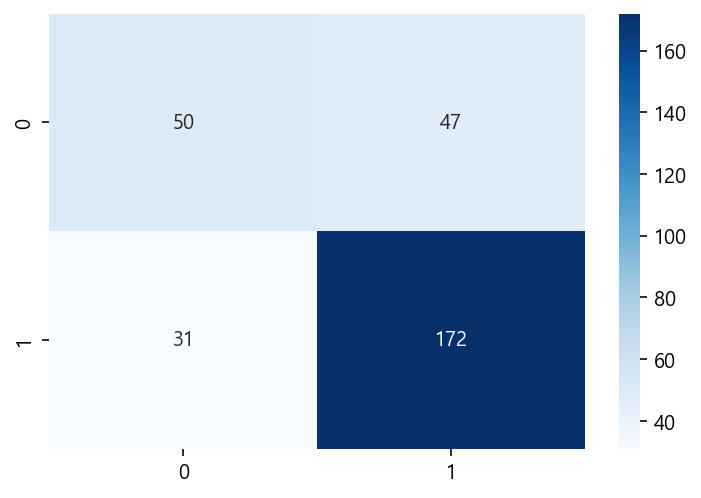

In [61]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='d')
plt.show()

- (의견) 타 모델과 마찬가지로 데이터의 불균형이 확연하게 나타난다.
- (의견) 샘플링을통해 데이터의 불균형을 해결하고 새로 모델링 해볼 필요가 있다.

**2) 주요변수확인**

- 신용도에 영향을 미치는 주요 변수 확인

In [62]:
# 중요도 확인
print(list(x))
print(model.feature_importances_)

['CreditDuration', 'CreditAmount', 'Age', 'AccountBalance_no balance', 'AccountBalance_some balance', 'Payment_no problem', 'Payment_other credits', 'Payment_paid up', 'Payment_previous credits paid', 'Purpose_TV', 'Purpose_appliances', 'Purpose_business', 'Purpose_new car', 'Purpose_others', 'Purpose_repair', 'Purpose_retaining', 'Purpose_used car', 'Purpose_vacation', 'SexMarital_male and diversed', 'SexMarital_male and married/widowed', 'SexMarital_male and single', 'MostValuable_life insurance', 'MostValuable_none', 'MostValuable_real estate', 'ApartmentType_owned', 'ApartmentType_rented', 'Occupation_executive', 'Occupation_skilled', 'Occupation_unskilled permanent resident', 'Telephone_2', 'ForeignWorker_2', 'Employment_4~7', 'Employment_above 7', 'Employment_less 1 year', 'Employment_unemployed', 'CurrentAddress_4~7', 'CurrentAddress_above 7', 'CurrentAddress_less 1 year', 'NoCredits_2', 'NoCredits_3', 'NoCredits_4']
[0.02738169 0.02299868 0.02251605 0.01910261 0.1128036  0.0271

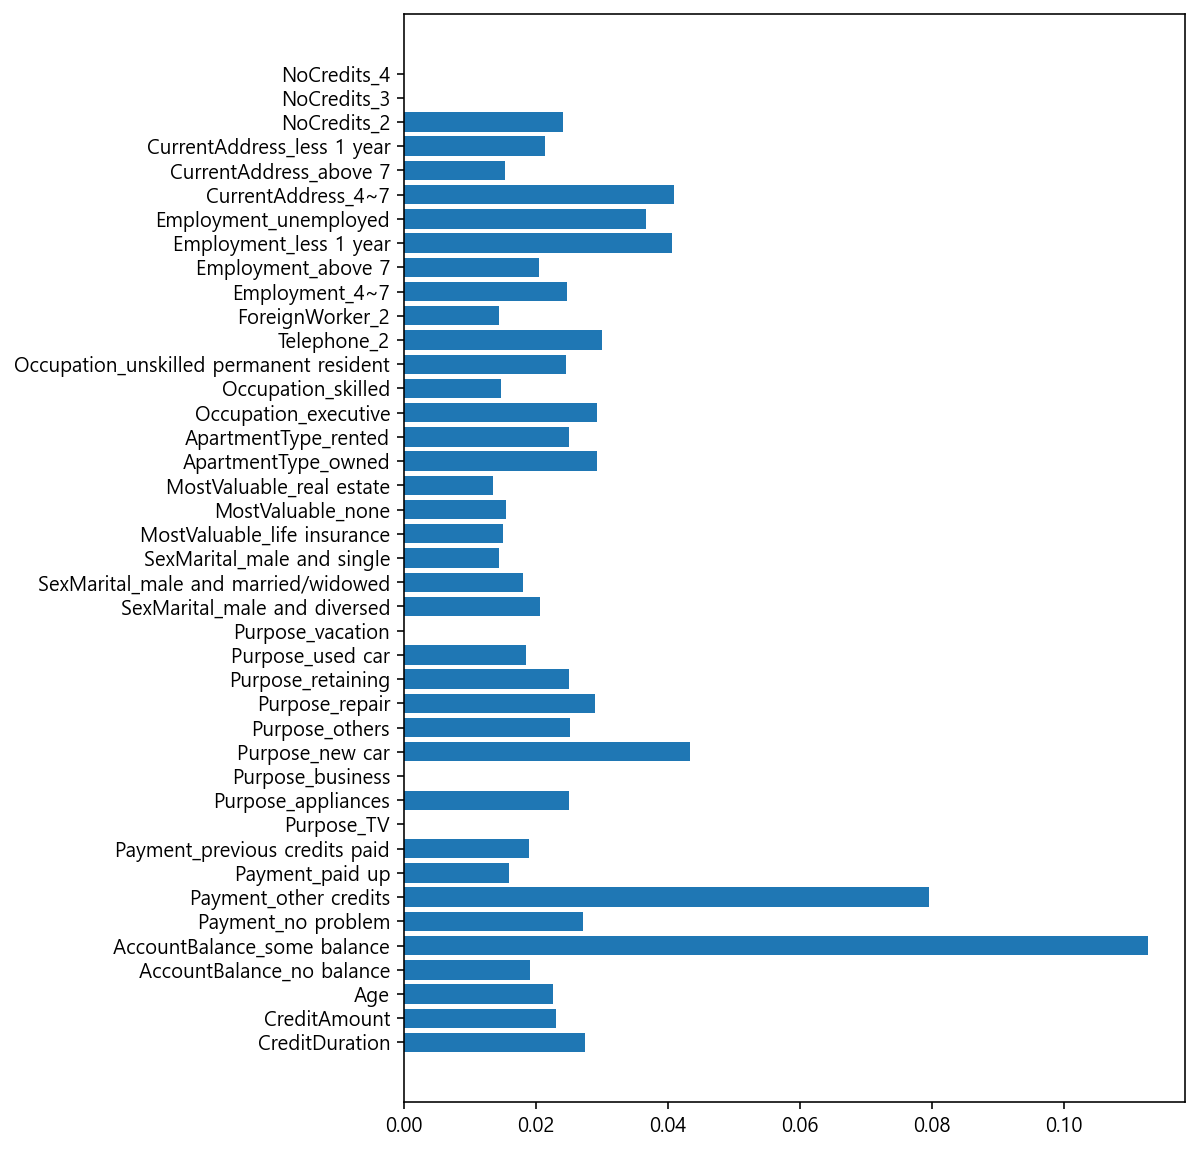

In [63]:
# 중요도 시각화
plt.figure(figsize=(7,10))
plt.barh(list(x), model.feature_importances_)
plt.show()

- (의견) 계좌에 돈이 있는것이 가장 주요한 변수이다.
- (의견) 이 모델에서 다른 융좌가 있는것이 주요한 변수로 나타났다.

# 5.모델 성능 비교 및 정리

In [64]:
list(score.keys())

['Logistic Regression', 'Decision Tree', 'KNN', 'Random Forest', 'XGBoost']

In [65]:
list(score.values())

[[0.7772727272727272, 0.8423645320197044, 0.73],
 [0.7746478873239436, 0.812807881773399, 0.7133333333333334],
 [0.7298387096774194, 0.8916256157635468, 0.7033333333333334],
 [0.7629310344827587, 0.8719211822660099, 0.73],
 [0.7853881278538812, 0.8472906403940886, 0.74]]

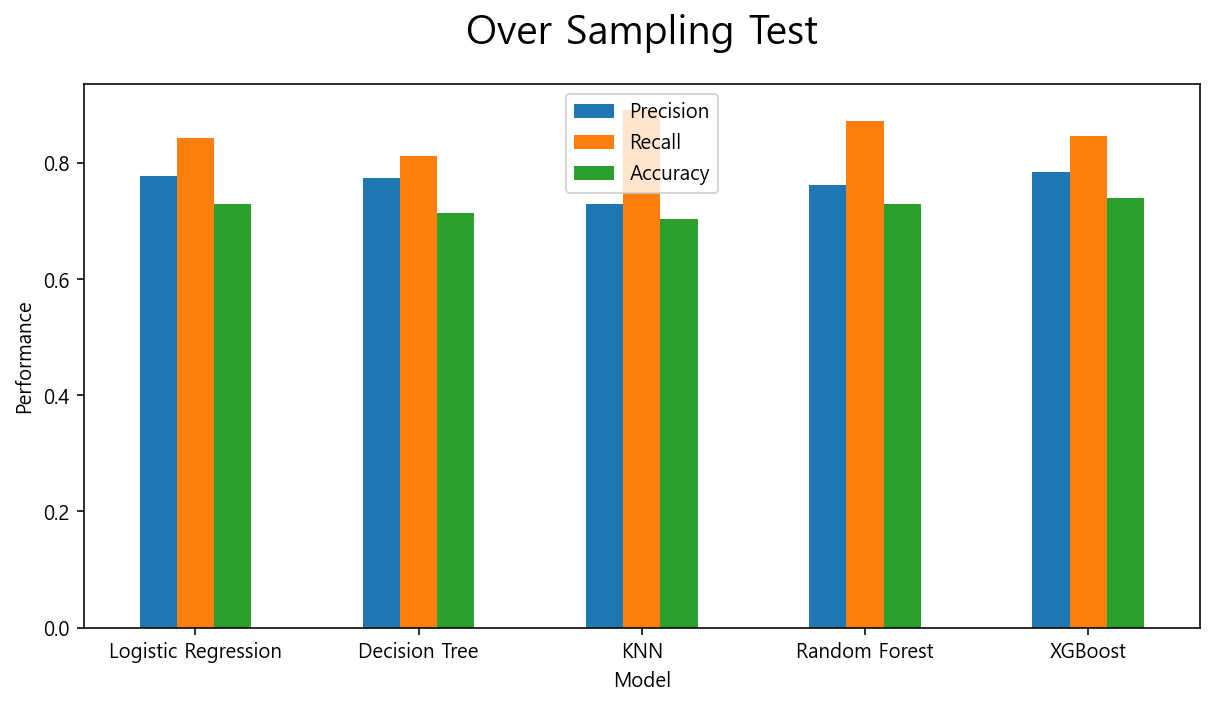

In [66]:
tmp = pd.DataFrame.from_dict(score, orient='index', columns=['Precision', 'Recall', 'Accuracy'])
tmp.plot(kind='bar')
fig = plt.gcf()
fig.set_size_inches(10, 5)
plt.title('Over Sampling Test', size=20, pad=20)
plt.xlabel('Model')
plt.ylabel('Performance')
plt.xticks(rotation=0)
plt.show()

- (의견) 전체적인 성능은 오버샘플링을 진행한 데이터가 높다.
- (의견) 신용도를 통해 대출가능여부를 판단하기 최적긔 모델은 랜덤포레스트를 활용한 모델로 추측된다.
- (의견) 보다 정확하게 신용도를 예측하여 대출가능한 사람을 분류해야하기 때문에 재현율또한 중요하다.
- (의견) 일정 이상의 성능을 보인 랜덤포레스트와 XGBoost를 튜닝해볼 필요가 있다.
- (의견) 튜닝을 진행하고 주요 변수를 확인하고 분석하여 신용도에 영향을 끼치는 변수를 확인한다.

# 6.성능 튜닝(1개 이상)

- 특정 알고리즘의 모델을 튜닝 대상으로 정하고 나름의 방법으로 모델 성능을 높여봅니다.

## 6.1.랜덤포레스트 튜닝

In [67]:
# 오버샘플링
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=2022)
x_over, y_over = smote.fit_resample(x, y)

In [68]:
y_over.value_counts()

0    700
1    700
Name: Creditability, dtype: int64

In [69]:
# 7:3으로 분리
x_train, x_test, y_train, y_test = train_test_split(x_over, y_over, test_size=0.3, random_state=2022)

### 6.1.1.튜닝

In [71]:
# 기존 오버샘플링 모델
# 선언하기
model_r = RandomForestClassifier(random_state=2022)
# 학습하기
model_r.fit(x_train, y_train)
# 예측하기
y_pred = model_r.predict(x_test)
# 평가하기
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
score2={}
score2['Random Forest_over'] = [precision_score(y_test, y_pred),
                          recall_score(y_test, y_pred),
                          accuracy_score(y_test, y_pred)]

[[175  34]
 [ 28 183]]
              precision    recall  f1-score   support

           0       0.86      0.84      0.85       209
           1       0.84      0.87      0.86       211

    accuracy                           0.85       420
   macro avg       0.85      0.85      0.85       420
weighted avg       0.85      0.85      0.85       420



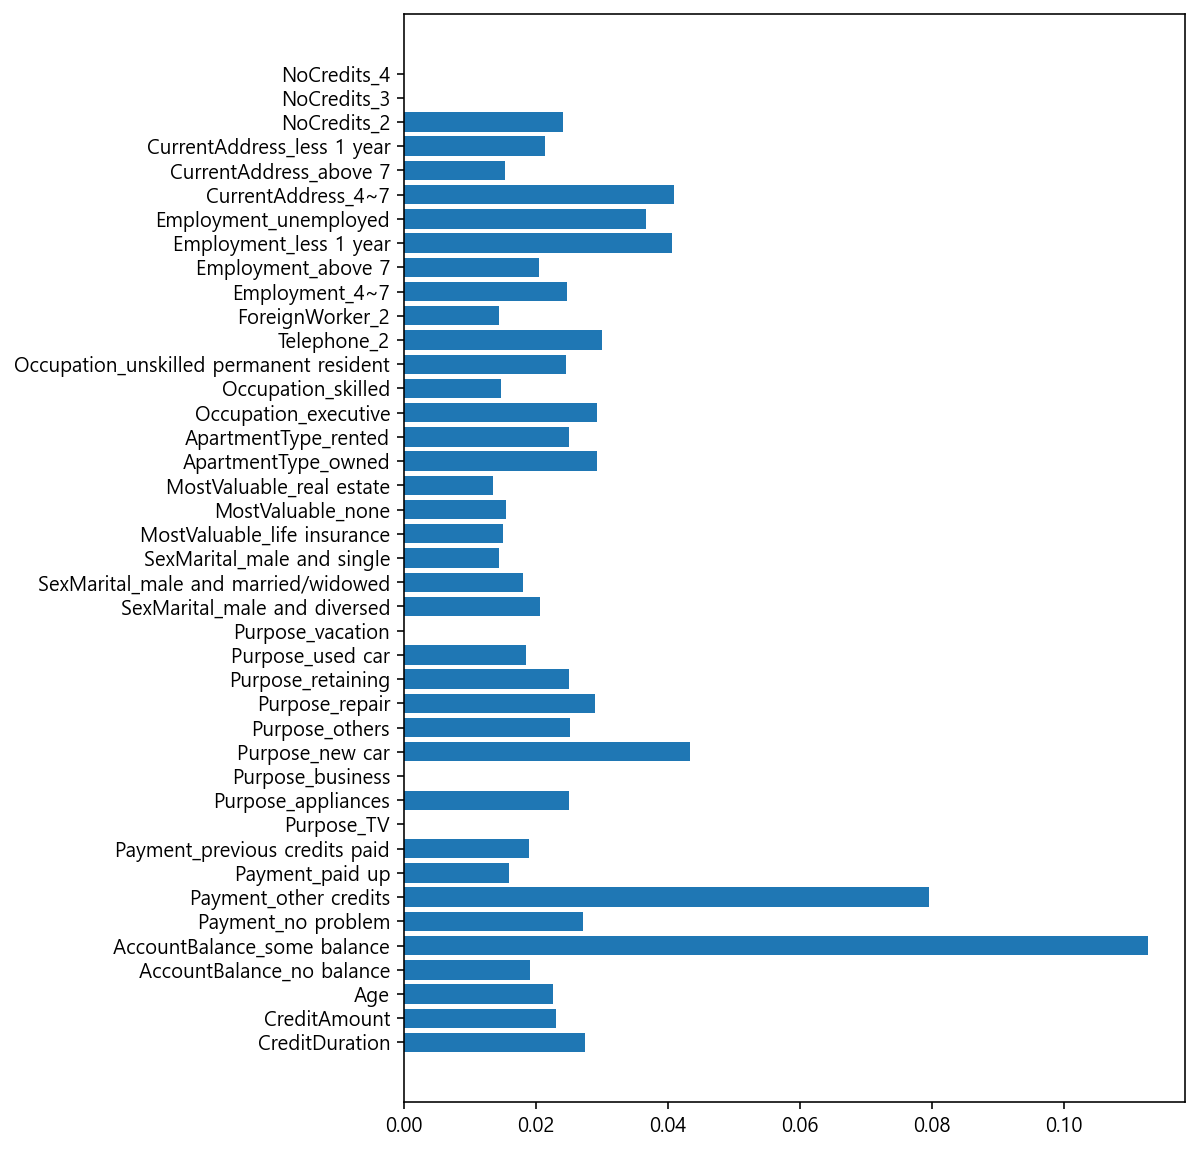

In [72]:
# 중요도 시각화
plt.figure(figsize=(7,10))
plt.barh(list(x), model.feature_importances_)
plt.show()

In [75]:
# 튜닝 model -> RandomSearch
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
param = {'max_depth':range(1,51,1), 'n_estimators':range(50,301,10)}
model = RandomizedSearchCV(model_r, param, cv=10, n_iter=20, scoring='recall')
model.fit(x_train, y_train)
print(model.cv_results_['param_max_depth'])
print(model.cv_results_['mean_test_score'])
print('-'*50)
print(model.best_params_)
print(model.best_score_)
y_pred = model.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[30 35 40 47 24 3 19 12 13 42 48 18 10 32 17 23 39 34 17 8]
[0.81203231 0.81003401 0.81415816 0.79982993 0.81619898 0.68107993
 0.80391156 0.79778912 0.80595238 0.81415816 0.79982993 0.80803571
 0.79162415 0.79982993 0.8099915  0.80994898 0.80595238 0.81415816
 0.81207483 0.76913265]
--------------------------------------------------
{'n_estimators': 270, 'max_depth': 24}
0.8161989795918367
[[175  34]
 [ 21 190]]
              precision    recall  f1-score   support

           0       0.89      0.84      0.86       209
           1       0.85      0.90      0.87       211

    accuracy                           0.87       420
   macro avg       0.87      0.87      0.87       420
weighted avg       0.87      0.87      0.87       420



In [76]:
param = {'max_depth':range(19,30,1), 'n_estimators':range(250,301,10)}
model = GridSearchCV(model_r, param, cv=10, n_jobs=-1, scoring='recall')
model.fit(x_train, y_train)
print(model.cv_results_['param_max_depth'])
print(model.cv_results_['mean_test_score'])
print('-'*50)
print(model.best_params_)
print(model.best_score_)
y_pred = model.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[19 19 19 19 19 19 20 20 20 20 20 20 21 21 21 21 21 21 22 22 22 22 22 22
 23 23 23 23 23 23 24 24 24 24 24 24 25 25 25 25 25 25 26 26 26 26 26 26
 27 27 27 27 27 27 28 28 28 28 28 28 29 29 29 29 29 29]
[0.8202381  0.81003401 0.81415816 0.81619898 0.81415816 0.81619898
 0.81211735 0.81003401 0.81211735 0.81415816 0.81211735 0.81415816
 0.81003401 0.81007653 0.80803571 0.81007653 0.81207483 0.81003401
 0.81415816 0.81415816 0.81619898 0.81415816 0.8079932  0.81415816
 0.81619898 0.81619898 0.81619898 0.81619898 0.81003401 0.81415816
 0.8182398  0.81619898 0.81619898 0.81211735 0.8079932  0.81415816
 0.81415816 0.81415816 0.81415816 0.81415816 0.81211735 0.81415816
 0.81619898 0.81415816 0.81415816 0.81415816 0.81415816 0.81415816
 0.81415816 0.81619898 0.81415816 0.81415816 0.81415816 0.81415816
 0.81415816 0.81415816 0.81415816 0.81211735 0.81415816 0.81415816
 0.81415816 0.81415816 0.81415816 0.81211735 0.81415816 0.81415816]
--------------------------------------------------
{'max_dep

In [124]:
param = {'max_depth':range(15,20,1), 'n_estimators':range(220,251,10)}
model = GridSearchCV(model_r, param, cv=10, n_jobs=-1, scoring='recall')
model.fit(x_train, y_train)
print(model.cv_results_['param_max_depth'])
print(model.cv_results_['mean_test_score'])
print('-'*50)
print(model.best_params_)
print(model.best_score_)
y_pred = model.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[15 15 15 15 16 16 16 16 17 17 17 17 18 18 18 18 19 19 19 19]
[0.80590986 0.80795068 0.80386905 0.80386905 0.81003401 0.81411565
 0.8079932  0.81411565 0.81207483 0.81207483 0.81207483 0.81411565
 0.81407313 0.82223639 0.81815476 0.81815476 0.81819728 0.81819728
 0.81411565 0.8202381 ]
--------------------------------------------------
{'max_depth': 18, 'n_estimators': 230}
0.822236394557823
[[176  33]
 [ 22 189]]
              precision    recall  f1-score   support

           0       0.89      0.84      0.86       209
           1       0.85      0.90      0.87       211

    accuracy                           0.87       420
   macro avg       0.87      0.87      0.87       420
weighted avg       0.87      0.87      0.87       420



In [87]:
score2['Random Forest_tune'] = [precision_score(y_test, y_pred),
                                recall_score(y_test, y_pred),
                                accuracy_score(y_test, y_pred)]

- (의견) 오버샘플링을 통해 데이터간의 불균형을 해소
- (의견) RandomSearch로 대략적인 파라미터를 확인후 그 주변 10개의 파라미터를 GridSearch로 분류하여 최적 파라미터 도출

### 6.1.2.튜닝 결과

In [103]:
# 중요도 확인
print(list(x))
print(model.feature_importances_)

['CreditDuration', 'CreditAmount', 'Age', 'AccountBalance_no balance', 'AccountBalance_some balance', 'Payment_no problem', 'Payment_other credits', 'Payment_paid up', 'Payment_previous credits paid', 'Purpose_TV', 'Purpose_appliances', 'Purpose_business', 'Purpose_new car', 'Purpose_others', 'Purpose_repair', 'Purpose_retaining', 'Purpose_used car', 'Purpose_vacation', 'SexMarital_male and diversed', 'SexMarital_male and married/widowed', 'SexMarital_male and single', 'MostValuable_life insurance', 'MostValuable_none', 'MostValuable_real estate', 'ApartmentType_owned', 'ApartmentType_rented', 'Occupation_executive', 'Occupation_skilled', 'Occupation_unskilled permanent resident', 'Telephone_2', 'ForeignWorker_2', 'Employment_4~7', 'Employment_above 7', 'Employment_less 1 year', 'Employment_unemployed', 'CurrentAddress_4~7', 'CurrentAddress_above 7', 'CurrentAddress_less 1 year', 'NoCredits_2', 'NoCredits_3', 'NoCredits_4']
[0.09598494 0.10002194 0.0855326  0.03073617 0.13204906 0.0125

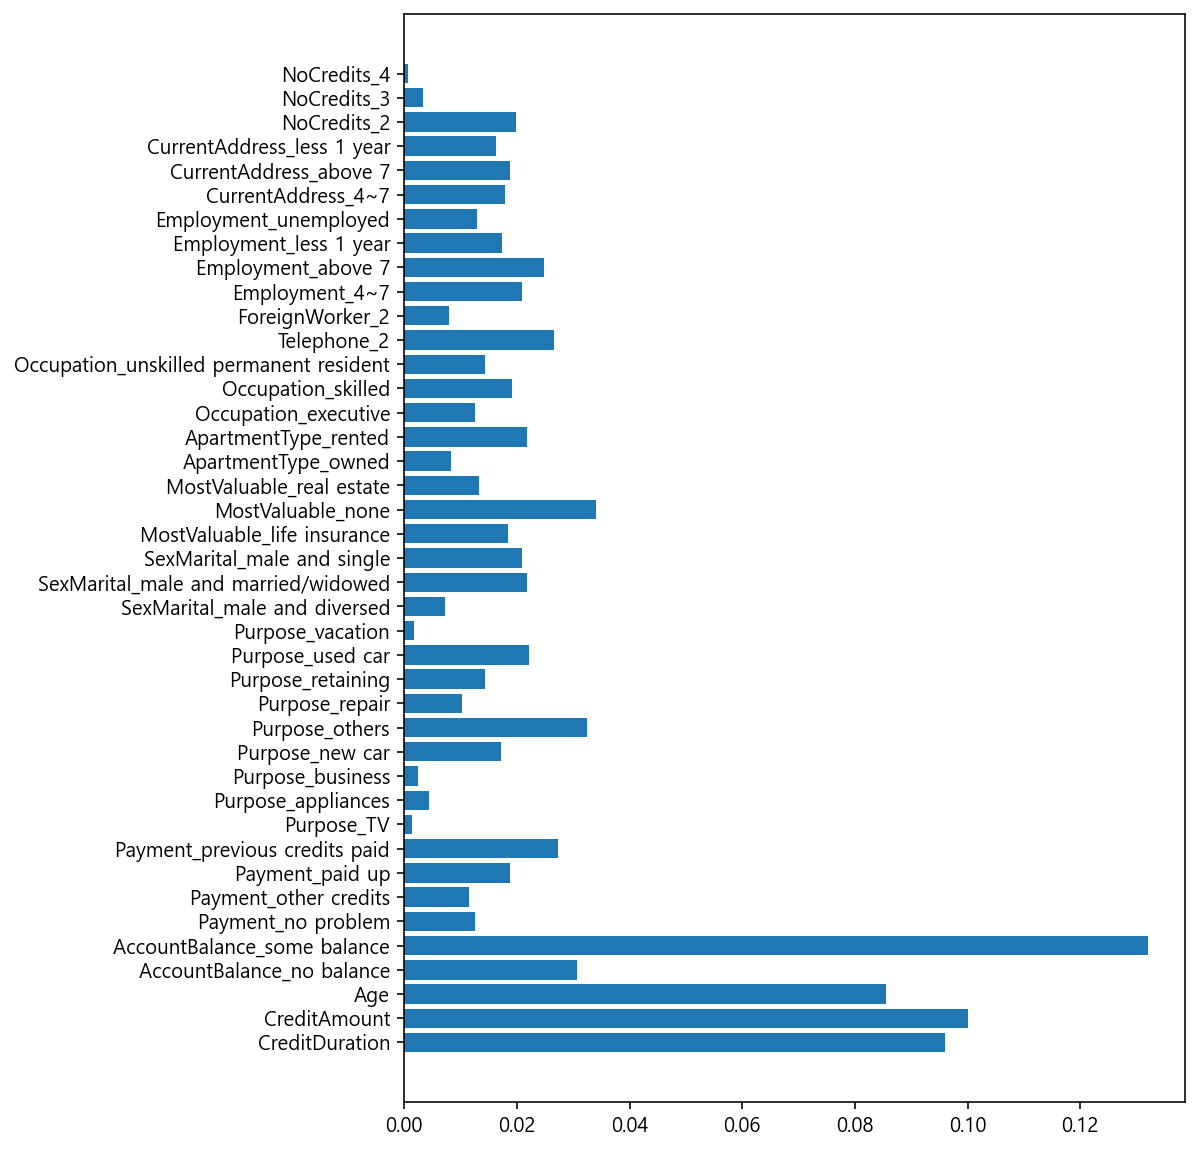

In [104]:
# 중요도 시각화
plt.figure(figsize=(7,10))
plt.barh(list(x), model.feature_importances_)
plt.show()

- (의견) 현재 은행의 잔고가 있는지, 대출신청기간과 대출금액이 대출가능여부에 가장 영향을 많이 미친다.
- (의견) 오버샘플링을 통해 데이터의 불균형을 해소하였을때 성능이 월등하게 좋아졌다.
- (의견) 학습데이터 성능보다 실제 데이터 예측시 성능이 더 뛰어났다.
- (의견) 은행 입장에서 실제 대출이 불가능한 사람과 실제 대출이 가능한 사람을 찾아내는 것이 중요하다.(재현율 사용)
- (의견) 실제 대출이 가능한 사람은 90%의 확률로 불가능한 사라은 84퍼센트의 확률로 찾아낼 수 있는 모델이다.

## 6.2. XGBoost튜닝

### 6.2.1.튜닝

In [110]:
# 기존 오버샘플링 모델
# 선언하기
model_X = XGBClassifier(random_state=2022, eval_metric='logloss')
# 학습하기
model_X.fit(x_train, y_train)
# 예측하기
y_pred = model_X.predict(x_test)
# 평가하기
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
score2['XGBoost_over'] = [precision_score(y_test, y_pred),
                          recall_score(y_test, y_pred),
                          accuracy_score(y_test, y_pred)]

[[165  44]
 [ 33 178]]
              precision    recall  f1-score   support

           0       0.83      0.79      0.81       209
           1       0.80      0.84      0.82       211

    accuracy                           0.82       420
   macro avg       0.82      0.82      0.82       420
weighted avg       0.82      0.82      0.82       420



In [105]:
param = {'max_depth':range(1,51,1), 'n_estimators':range(50,301,10)}
model = RandomizedSearchCV(model_X, param, cv=10, n_iter=20, scoring='recall')
model.fit(x_train, y_train)
print(model.cv_results_['param_max_depth'])
print(model.cv_results_['mean_test_score'])
print('-'*50)
print(model.best_params_)
print(model.best_score_)
y_pred = model.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[38 7 38 24 13 48 43 18 18 50 12 49 18 40 47 22 5 42 17 4]
[0.8182398  0.82423469 0.81411565 0.82028061 0.81611395 0.81003401
 0.82236395 0.82644558 0.82028061 0.81615646 0.82028061 0.80795068
 0.81819728 0.82440476 0.82236395 0.82236395 0.8079932  0.8182398
 0.80595238 0.81819728]
--------------------------------------------------
{'n_estimators': 290, 'max_depth': 18}
0.8264455782312925
[[174  35]
 [ 33 178]]
              precision    recall  f1-score   support

           0       0.84      0.83      0.84       209
           1       0.84      0.84      0.84       211

    accuracy                           0.84       420
   macro avg       0.84      0.84      0.84       420
weighted avg       0.84      0.84      0.84       420



In [107]:
param = {'max_depth':range(14,22,1), 'n_estimators':range(250,320,10)}
model = GridSearchCV(model_X, param, cv=10, n_jobs=-1, scoring='recall')
model.fit(x_train, y_train)
print(model.cv_results_['param_max_depth'])
print(model.cv_results_['mean_test_score'])
print('-'*50)
print(model.best_params_)
print(model.best_score_)
y_pred = model.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[14 14 14 14 14 14 14 15 15 15 15 15 15 15 16 16 16 16 16 16 16 17 17 17
 17 17 17 17 18 18 18 18 18 18 18 19 19 19 19 19 19 19 20 20 20 20 20 20
 20 21 21 21 21 21 21 21]
[0.83660714 0.83456633 0.83248299 0.83248299 0.83248299 0.83452381
 0.83452381 0.8202381  0.8202381  0.82636054 0.82436224 0.82436224
 0.82640306 0.82640306 0.83048469 0.83048469 0.83048469 0.83048469
 0.82844388 0.82844388 0.82844388 0.82032313 0.81828231 0.81828231
 0.8162415  0.81828231 0.8162415  0.81420068 0.82440476 0.82236395
 0.82440476 0.82644558 0.82644558 0.82440476 0.82440476 0.82644558
 0.82440476 0.82644558 0.82848639 0.82848639 0.82644558 0.82644558
 0.82236395 0.82032313 0.82236395 0.82440476 0.82440476 0.82236395
 0.82236395 0.82236395 0.82032313 0.82236395 0.82440476 0.82440476
 0.82236395 0.82236395]
--------------------------------------------------
{'max_depth': 14, 'n_estimators': 250}
0.8366071428571429
[[171  38]
 [ 30 181]]
              precision    recall  f1-score   support

           0  

In [108]:
param = {'max_depth':range(10,15,1), 'n_estimators':range(200,251,10)}
model = GridSearchCV(model_X, param, cv=10, n_jobs=-1, scoring='recall')
model.fit(x_train, y_train)
print(model.cv_results_['param_max_depth'])
print(model.cv_results_['mean_test_score'])
print('-'*50)
print(model.best_params_)
print(model.best_score_)
y_pred = model.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[10 10 10 10 10 10 11 11 11 11 11 11 12 12 12 12 12 12 13 13 13 13 13 13
 14 14 14 14 14 14]
[0.82644558 0.83052721 0.83052721 0.82848639 0.83256803 0.83256803
 0.82219388 0.81607143 0.82015306 0.82015306 0.82223639 0.82427721
 0.82028061 0.8182398  0.81619898 0.82028061 0.82436224 0.81819728
 0.8099915  0.80590986 0.80795068 0.80382653 0.80586735 0.81003401
 0.83048469 0.83048469 0.83252551 0.83252551 0.83252551 0.83660714]
--------------------------------------------------
{'max_depth': 14, 'n_estimators': 250}
0.8366071428571429
[[171  38]
 [ 30 181]]
              precision    recall  f1-score   support

           0       0.85      0.82      0.83       209
           1       0.83      0.86      0.84       211

    accuracy                           0.84       420
   macro avg       0.84      0.84      0.84       420
weighted avg       0.84      0.84      0.84       420



- (의견) 튜닝결과 전체적으로 성능이 좋아졌다.
- (의견) 최적 파라미터 max_depth = 14, n_estimators = 250이다.

### 6.2.2.튜닝 결과

In [109]:
score2['XGBoost_tune'] = [precision_score(y_test, y_pred),
                          recall_score(y_test, y_pred),
                          accuracy_score(y_test, y_pred)]

In [119]:
# 중요도 확인
print(list(x))
print(model.best_estimator_.feature_importances_)

['CreditDuration', 'CreditAmount', 'Age', 'AccountBalance_no balance', 'AccountBalance_some balance', 'Payment_no problem', 'Payment_other credits', 'Payment_paid up', 'Payment_previous credits paid', 'Purpose_TV', 'Purpose_appliances', 'Purpose_business', 'Purpose_new car', 'Purpose_others', 'Purpose_repair', 'Purpose_retaining', 'Purpose_used car', 'Purpose_vacation', 'SexMarital_male and diversed', 'SexMarital_male and married/widowed', 'SexMarital_male and single', 'MostValuable_life insurance', 'MostValuable_none', 'MostValuable_real estate', 'ApartmentType_owned', 'ApartmentType_rented', 'Occupation_executive', 'Occupation_skilled', 'Occupation_unskilled permanent resident', 'Telephone_2', 'ForeignWorker_2', 'Employment_4~7', 'Employment_above 7', 'Employment_less 1 year', 'Employment_unemployed', 'CurrentAddress_4~7', 'CurrentAddress_above 7', 'CurrentAddress_less 1 year', 'NoCredits_2', 'NoCredits_3', 'NoCredits_4']
[0.02393131 0.01192136 0.01139052 0.02295645 0.17629033 0.0280

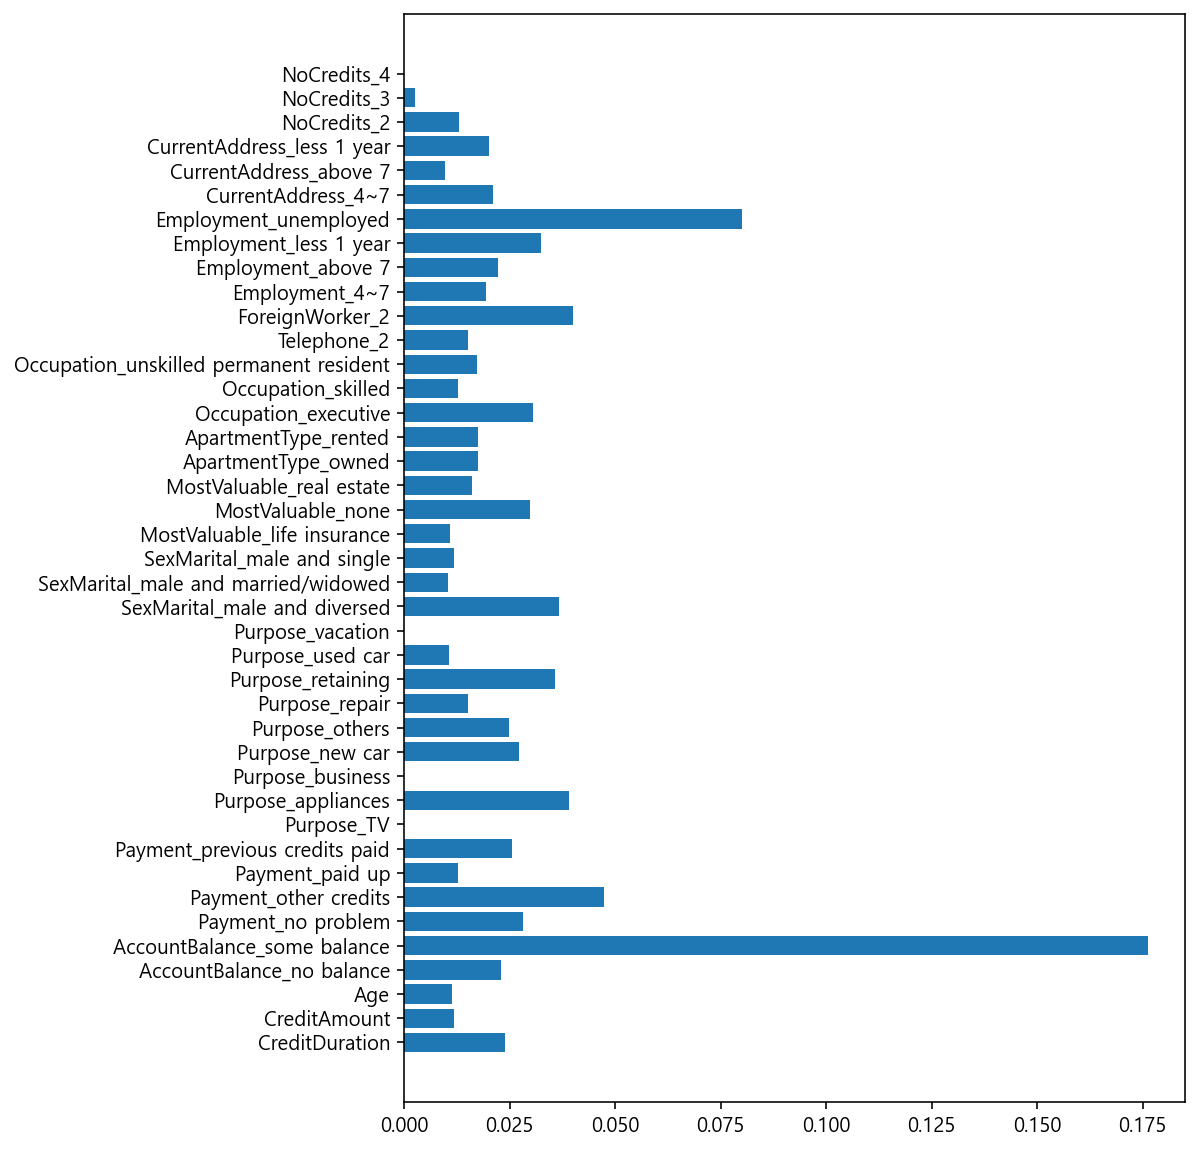

In [120]:
# 중요도 시각화
plt.figure(figsize=(7,10))
plt.barh(list(x), model.best_estimator_.feature_importances_)
plt.show()

- (의견) 튜닝결과 전체적인 성능은 증가하였다.
- (의견) 현재 잔고에 돈이 있는지가 신용도에 영향을 끼치는 가장 주요한 변수이다.
- (의견) 랜덤포레스트 모델보다 전체적인 성능이 떨어진다.
- (의견) 직업의 상태도 신용도에 주요한 영향을 끼친다.
- (의견) 성능이 크게 떨어지지 않기 때문에 파악한 주요 변수들과 신용도와의 관계를 분석해볼 필요가 있다.

# 7.종합 정리

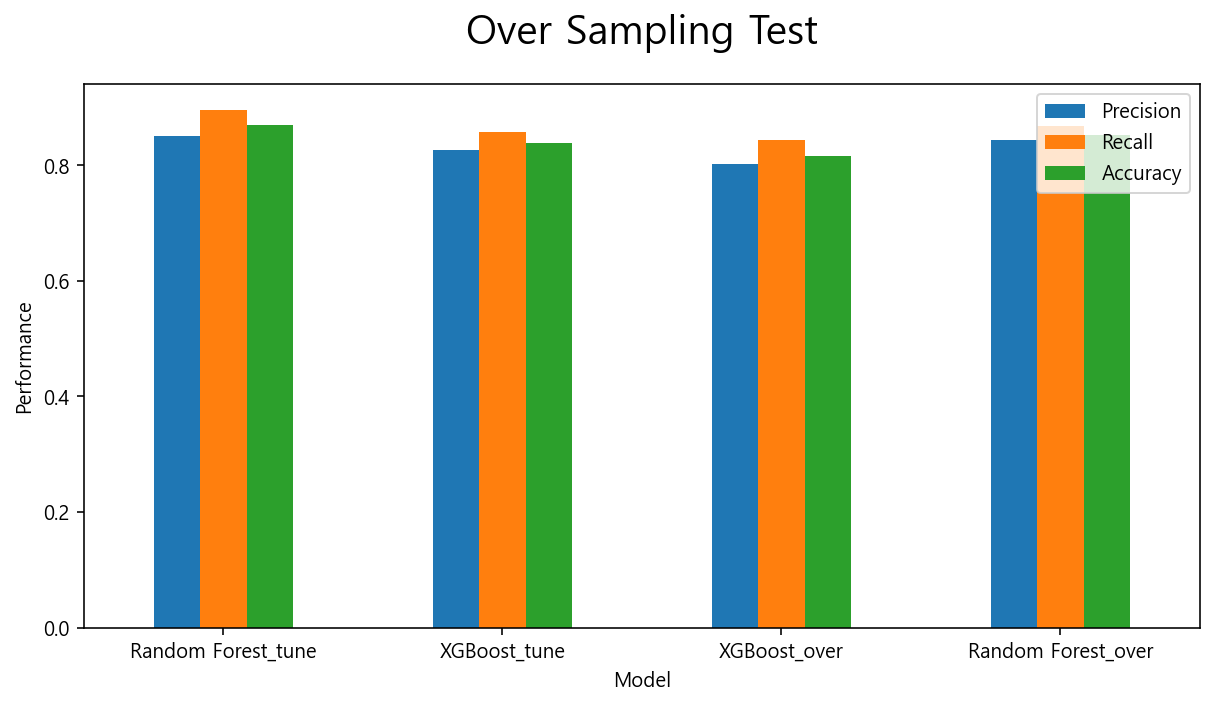

In [128]:
tmp = pd.DataFrame.from_dict(score2, orient='index', columns=['Precision', 'Recall', 'Accuracy'])
tmp.plot(kind='bar')
fig = plt.gcf()
fig.set_size_inches(10, 5)
plt.title('Test', size=20, pad=20)
plt.xlabel('Model')
plt.ylabel('Performance')
plt.xticks(rotation=0)
plt.show()

- (의견) 신용도를 예측하여 대출이 가능한 사람과 불가능한 사람을 적절하게 예측하는것이 중요하다.
- (의견) 재현율이 높은 튜닝한 랜덤포레스트를 사용하여 신용도를 예측하고 대출가능여부를 통해 이익을 높일 수 있을것으로 기대된다.
- (의견) 잔고에 돈이 존재하는지, 대출신청금액과 기간 등을 고려하여 신용도를 예측해야한다.
- (의견) 이전 모델에서 발견한 주요변수인 나이와 취직하지 않은 상태 등 또한 추가 분석하여 신용도를 예측해야한다.
- (의견) 튜닝한 모델은 87%의 정확도를 가지고 있으며 실제 대출 가능한사람을 예측할 확률은 90%이다.